In [514]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [515]:
# IPL_2020_Squads = pd.read_csv("IPL 2020 Squads.csv")
Matches_IPL_all = pd.read_csv("Matches IPL 2008-2019.csv")
Matches_IPL_2020 = pd.read_csv("Matches IPL 2020.csv")
sample_submission = pd.read_csv("sample_submission.csv")
train = pd.read_csv("Training.csv")

In [516]:
Matches_IPL_all

,match_id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,60,2008,Bangalore,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,61,2008,Chandigarh,19-04-2008,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,62,2008,Delhi,19-04-2008,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,63,2008,Mumbai,20-04-2008,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,64,2008,Kolkata,20-04-2008,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,5/5/2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,7/5/2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,8/5/2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/5/2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [517]:
Matches_IPL_2020

,match_id,city,date,team1,team2,venue,umpire1,umpire2,umpire3
0,1216492,Abu Dhabi,9/19/2020,MI,CSK,"Sheikh Zayed Stadium, Abu Dhabi",Chris Gaffaney,Virender Sharma,Sundaram Ravi
1,1216493,Dubai (DSC),9/20/2020,DC,KXIP,Dubai International Cricket Stadium,Anil Chaudhary,Nitin Menon,Paul Reiffel
2,1216534,Dubai (DSC),9/21/2020,SRH,RCB,Dubai International Cricket Stadium,Anil Dandekar,Nitin Menon,Anil Chaudhary
3,1216496,Sharjah,9/22/2020,RR,CSK,Sharjah Cricket Stadium,Chettithody Shamshuddin,Vineet Kulkarni,KN Ananthapadmanabhan
4,1216508,Abu Dhabi,9/23/2020,KKR,MI,"Sheikh Zayed Stadium, Abu Dhabi",Chris Gaffaney,Sundaram Ravi,Virender Sharma
5,1216510,Dubai (DSC),9/24/2020,KXIP,RCB,Dubai International Cricket Stadium,Anil Chaudhary,Paul Reiffel,Nitin Menon
6,1216539,Dubai (DSC),9/25/2020,CSK,DC,Dubai International Cricket Stadium,KN Ananthapadmanabhan,Richard Illingworth,Krishnamachari Srinivasan
7,1216545,Abu Dhabi,9/26/2020,KKR,SRH,"Sheikh Zayed Stadium, Abu Dhabi",Chris Gaffaney,Virender Sharma,Sundaram Ravi
8,1216527,Sharjah,9/27/2020,RR,KXIP,Sharjah Cricket Stadium,Richard Illingworth,Krishnamachari Srinivasan,Chettithody Shamshuddin
9,1216547,Dubai (DSC),9/28/2020,RCB,MI,Dubai International Cricket Stadium,Nitin Menon,Paul Reiffel,Anil Chaudhary


In [518]:
sample_submission

,Id,Total Points
0,1216492_AS Yadav,0
1,1216492_AT Rayudu,0
2,1216492_DL Chahar,0
3,1216492_F du Plessis,0
4,1216492_HH Pandya,0
...,...,...
1278,1237181_S Hetmyer,0
1279,1237181_SA Yadav,0
1280,1237181_SS Iyer,0
1281,1237181_SS Tiwary,0


In [519]:
train

,Id,Runs,Boundaries,Six,Fifty,Hundred,Duck,Batting_Points,Wickets,4W_Haul,5W_Haul,Maidens,Bowling_Points,Total Points
0,1_Bipul Sharma,0,0,0,0,0,0,0,1,0,0,0,25,25
1,1_DJ Hooda,16,1,1,0,0,0,19,1,0,0,0,25,44
2,1_KM Jadhav,31,5,1,0,0,0,38,0,0,0,0,0,38
3,1_Mandeep Singh,24,5,0,0,0,0,29,0,0,0,0,0,29
4,1_Yuvraj Singh,62,10,3,1,0,0,86,0,0,0,0,0,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15911,11415_RA Jadeja,9,1,0,0,0,0,10,0,0,0,0,0,10
15912,11415_Harbhajan Singh,0,0,0,0,0,0,0,0,0,0,0,0,0
15913,11415_RG Sharma,15,2,1,0,0,0,19,0,0,0,0,0,19
15914,11415_SN Thakur,2,0,0,0,0,0,2,2,0,0,0,50,52


In [520]:
train["Total Points"].unique()

array([ 25,  44,  38,  29,  86,  39,  34,  33,   1,  50,  43,  26,  19,
        69,  -2,  28,  22,  45, 108,  49,  41,  13,   3,   0,  35,   7,
        23,  10,  75,  83,  73, 131,  17,  59,  96,  21,   5,  18,  53,
        37,   8,  32,  63,  97,  15,  12,  14,  55,  80,  79,  51,  16,
        66, 102,  36,   6,  72,  88, 109,   2,  58, 127,   9,  31, 141,
        76,  54,  46,  62,  27,   4,  24,  56,  30,  91,  68,  81,  48,
        52,  42,  93,  11,  64,  95,  87,  71,  77,  40,  90,  57,  82,
       103, 111, 118,  20, 146, 107,  47, 138,  94, 120,  84, 112,  70,
        60, 176, 144,  92, 122, 124, 149, 106,  67, 130, 143,  61,  65,
       125,  74,  89, 121,  78, 223, 123, 167, 104, 165, 133, 164, 100,
       166, 116, 101, 175, 152, 172, 163, 119, 128, 113,  85,  98, 147,
       142, 148, 154, 157, 156, 151,  99, 115, 145, 184, 126, 161, 105,
       137, 214, 201, 235, 139, 199, 198, 117, 114, 134, 190, 305, 129,
       150, 158, 110, 135, 153, 227, 136, 174, 132, 181, 180, 19

In [521]:
Matches_IPL_all

,match_id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,60,2008,Bangalore,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,61,2008,Chandigarh,19-04-2008,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,62,2008,Delhi,19-04-2008,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,63,2008,Mumbai,20-04-2008,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,64,2008,Kolkata,20-04-2008,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,5/5/2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,7/5/2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,8/5/2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/5/2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [522]:
train

,Id,Runs,Boundaries,Six,Fifty,Hundred,Duck,Batting_Points,Wickets,4W_Haul,5W_Haul,Maidens,Bowling_Points,Total Points
0,1_Bipul Sharma,0,0,0,0,0,0,0,1,0,0,0,25,25
1,1_DJ Hooda,16,1,1,0,0,0,19,1,0,0,0,25,44
2,1_KM Jadhav,31,5,1,0,0,0,38,0,0,0,0,0,38
3,1_Mandeep Singh,24,5,0,0,0,0,29,0,0,0,0,0,29
4,1_Yuvraj Singh,62,10,3,1,0,0,86,0,0,0,0,0,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15911,11415_RA Jadeja,9,1,0,0,0,0,10,0,0,0,0,0,10
15912,11415_Harbhajan Singh,0,0,0,0,0,0,0,0,0,0,0,0,0
15913,11415_RG Sharma,15,2,1,0,0,0,19,0,0,0,0,0,19
15914,11415_SN Thakur,2,0,0,0,0,0,2,2,0,0,0,50,52


In [523]:
15916-1283

14633

# Toss Win By Teams

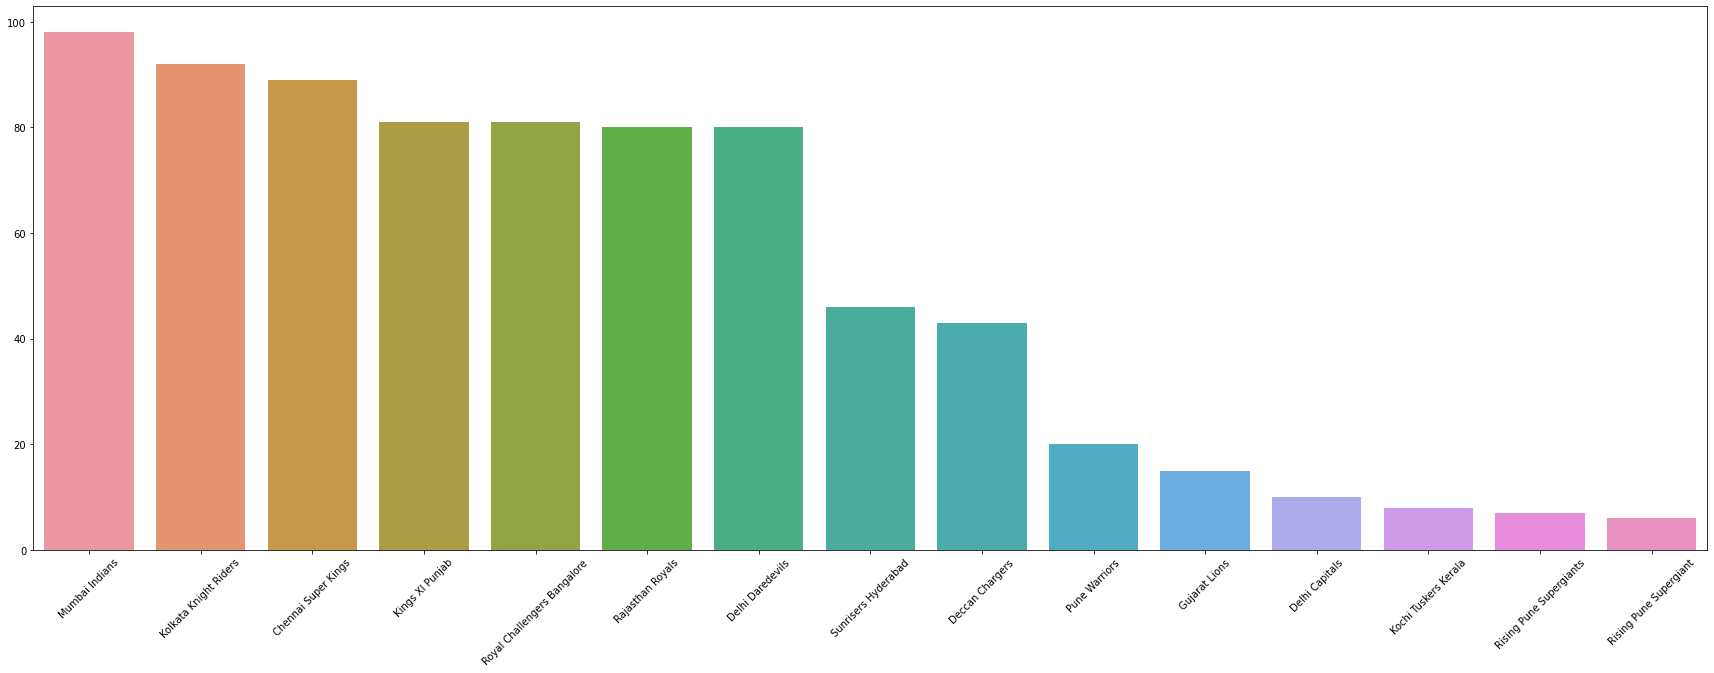

In [524]:
season = Matches_IPL_all['toss_winner'].value_counts()
plt.figure(figsize=(30, 10))
sns.barplot(season.index, season.values)
plt.xticks(rotation=45)
plt.show()


# Matches Win By Team

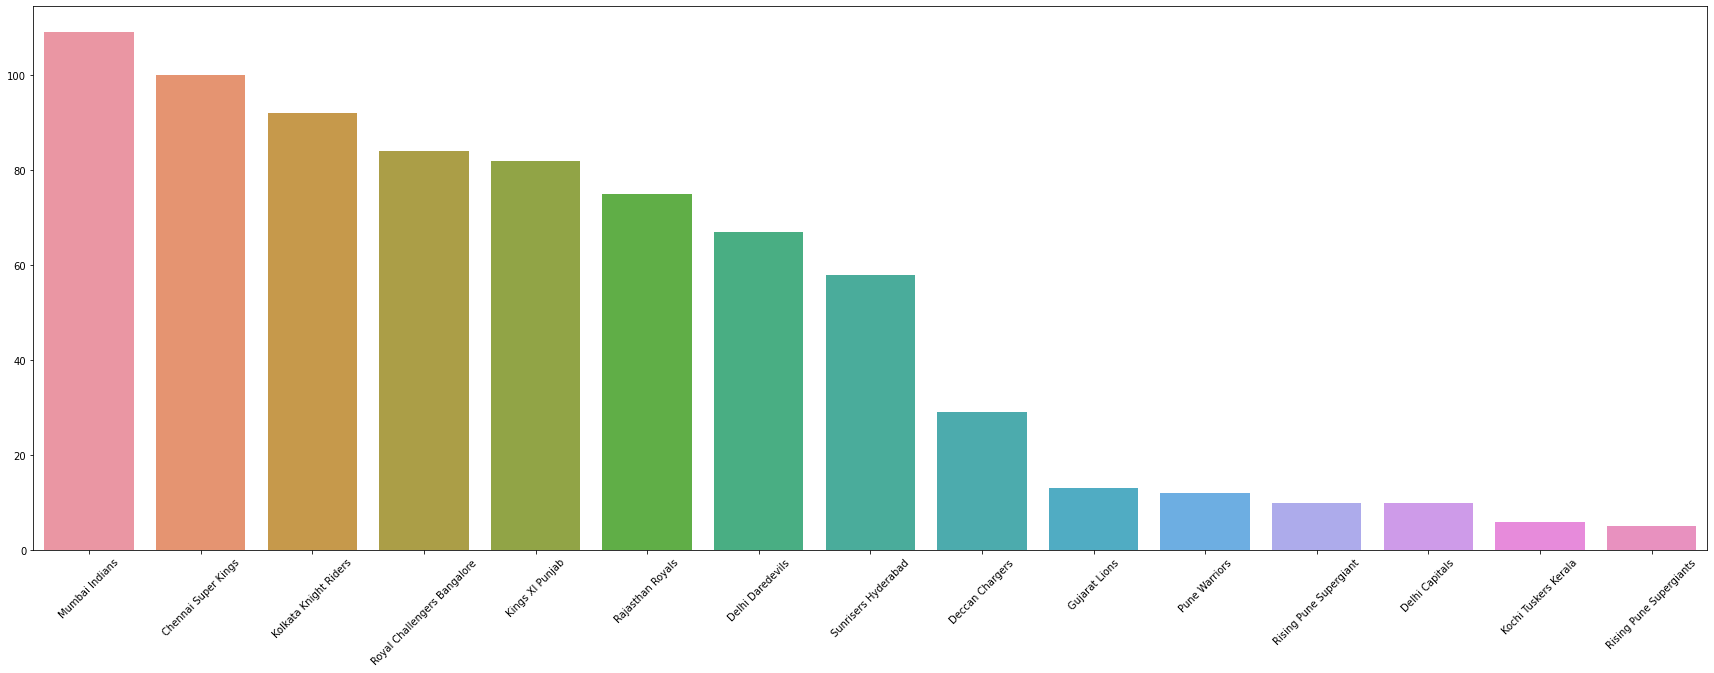

In [525]:
season = Matches_IPL_all['winner'].value_counts()
plt.figure(figsize=(30, 10))
sns.barplot(season.index, season.values)
plt.xticks(rotation=45)
plt.show()

# Toss Result

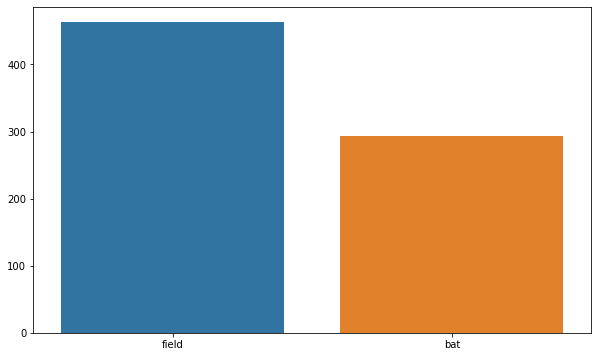

In [526]:
season = Matches_IPL_all['toss_decision'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(season.index, season.values)
plt.show()

In [527]:
Matches_IPL_all["toss_impact"] = np.where((Matches_IPL_all['toss_winner']==Matches_IPL_all["winner"]) ,1,0)

# On Winning the toss how team ended up in last

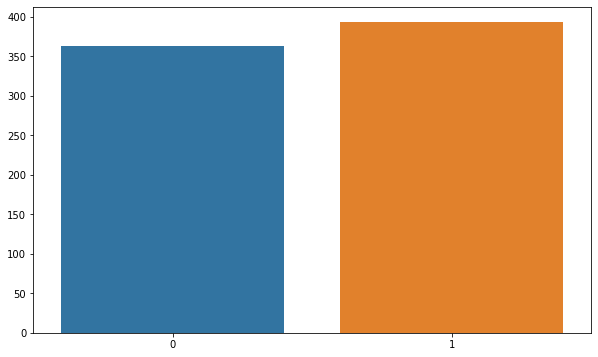

In [528]:
season = Matches_IPL_all['toss_impact'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(season.index, season.values)
plt.show()

# Matches played venu wise

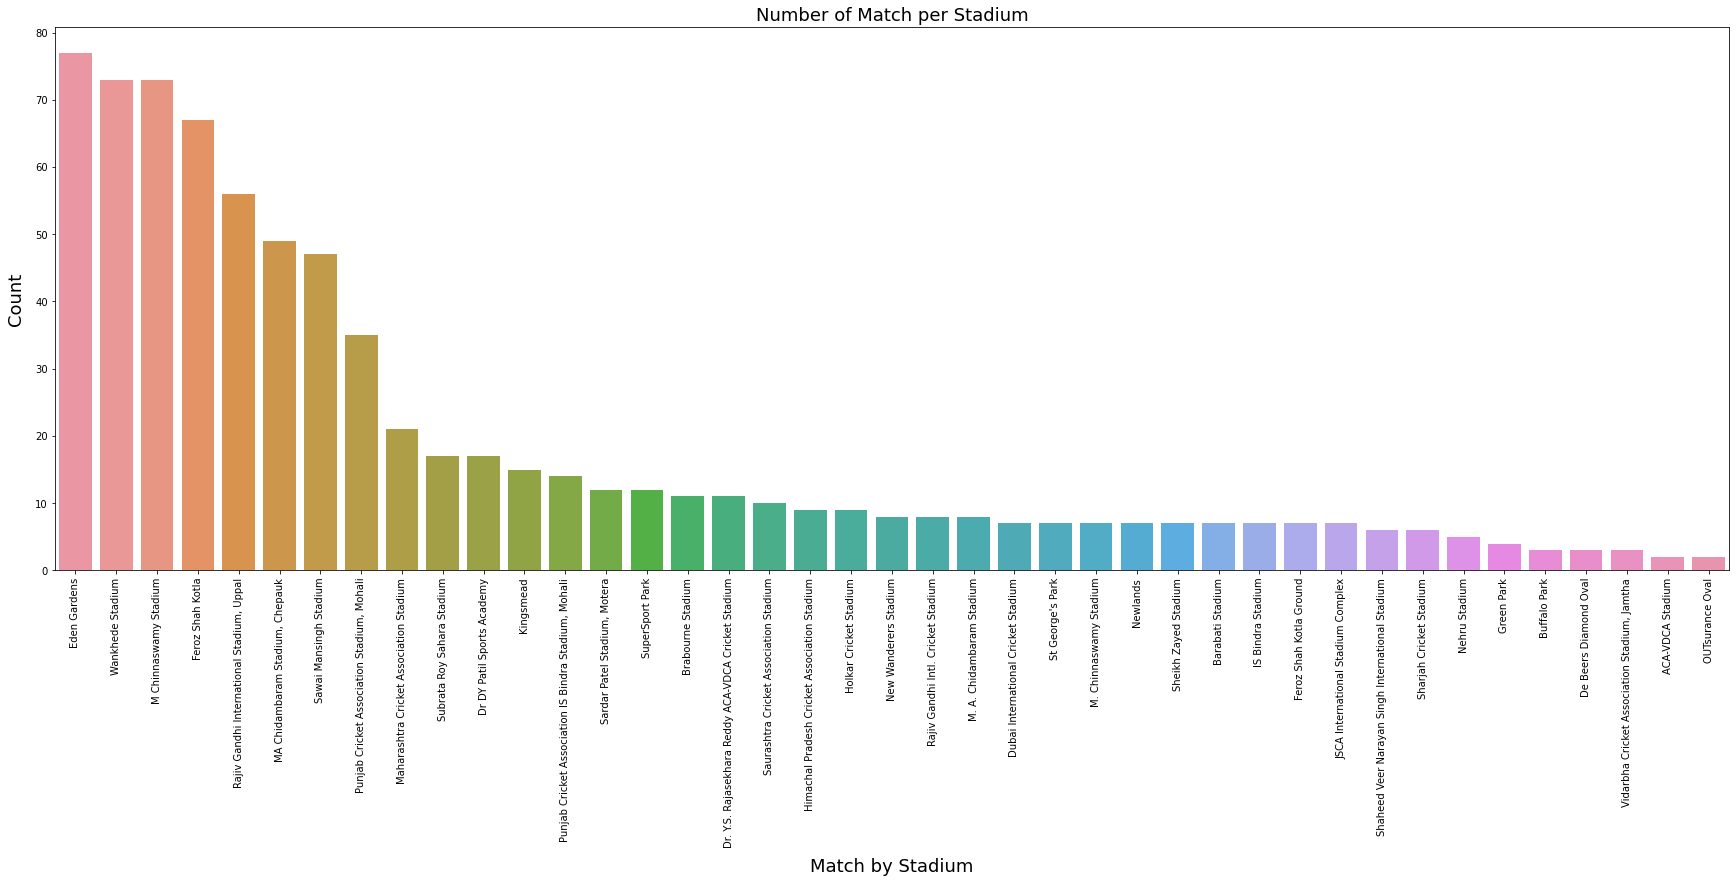

In [529]:
season = Matches_IPL_all['venue'].value_counts()
plt.figure(figsize=(30, 10))
sns.barplot(season.index, season.values)
plt.xticks(rotation=90)
# prev_match.groupby('venue').count()['match_id'].sort_values().plot(kind='barh', figsize=(12, 15), color='lightblue')
plt.ylabel("Count", labelpad=10, fontsize=18)
plt.xlabel("Match by Stadium", labelpad=10, fontsize=18)
plt.title("Number of Match per Stadium", fontsize=18);
plt.show()

# Matches played city wise

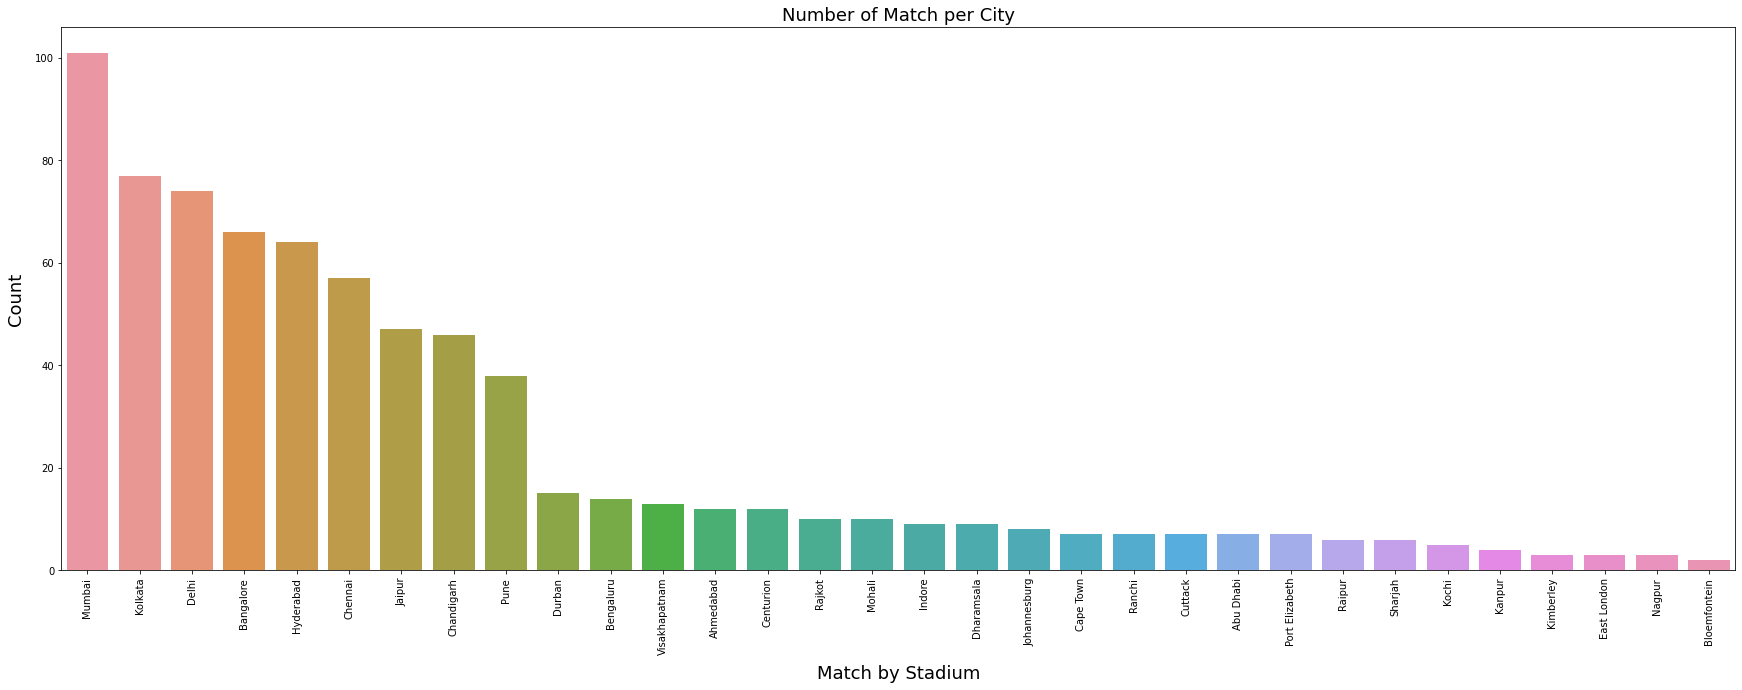

In [530]:
season = Matches_IPL_all['city'].value_counts()
plt.figure(figsize=(30, 10))
sns.barplot(season.index, season.values)
plt.xticks(rotation=90)
# prev_match.groupby('venue').count()['match_id'].sort_values().plot(kind='barh', figsize=(12, 15), color='lightblue')
plt.ylabel("Count", labelpad=10, fontsize=18)
plt.xlabel("Match by Stadium", labelpad=10, fontsize=18)
plt.title("Number of Match per City", fontsize=18);
plt.show()

In [531]:
Matches_IPL_all['result'].value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

# Match Result

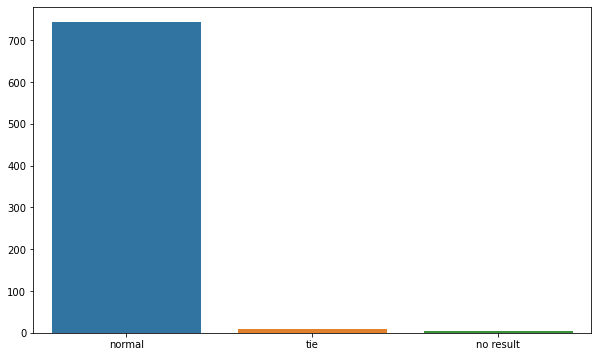

In [532]:
season = Matches_IPL_all['result'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(season.index, season.values)
plt.show()

# Points Scored By Different Players

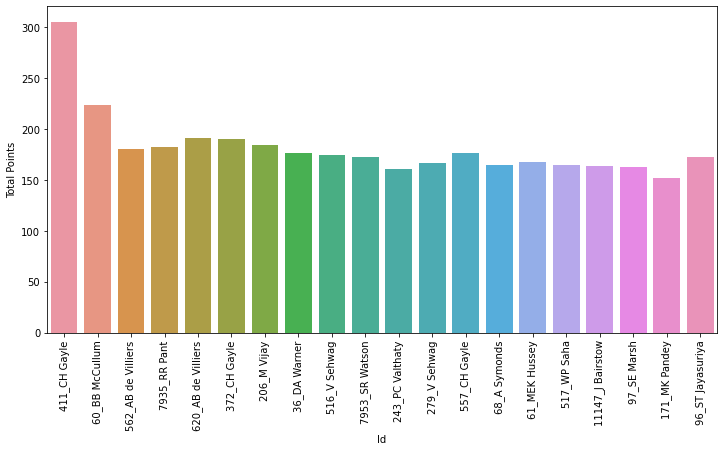

In [533]:
runs = train.sort_values('Runs', ascending=False).head(20)
plt.figure(figsize=(12, 6))
sns.barplot(runs['Id'], runs['Total Points'])
plt.xticks(rotation=90)
plt.show()

# Matches Played per season

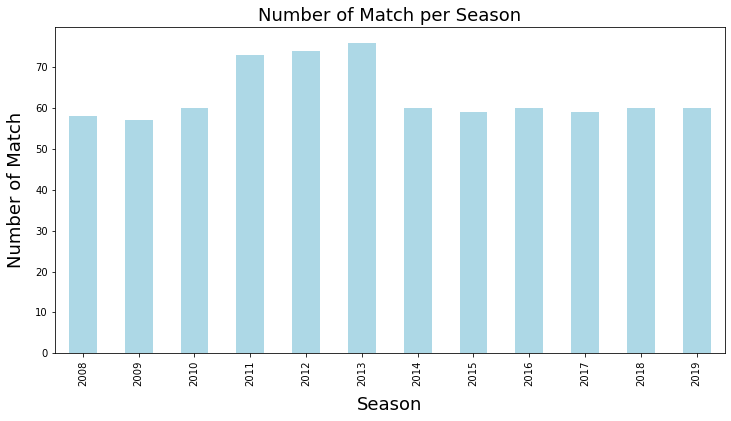

In [534]:
Matches_IPL_all.groupby('season').count()['match_id'].plot(kind='bar', figsize=(12, 6), color='lightblue')
plt.ylabel("Number of Match", labelpad=10, fontsize=18)
plt.xlabel("Season", labelpad=10, fontsize=18)
plt.title("Number of Match per Season", fontsize=18);

# After total matches played by the team how many of them have teams won

In [535]:
Total_matches=pd.concat([Matches_IPL_all['team1'],Matches_IPL_all['team2']])
Total_matches=Total_matches.value_counts().reset_index()
Total_matches.columns=['Team','Total Matches']
Total_matches['Team'] = Total_matches['Team'].replace(['Delhi Capitals'],'Delhi Daredevils')
Total_matches['Team'] = Total_matches['Team'].replace(['Deccan Chargers'],'Sunrisers Hyderabad')
Total_matches['Team'] = Total_matches['Team'].replace(['Rising Pune Supergiant'],'Pune Warriors')
Total_matches['Team'] = Total_matches['Team'].replace(['Rising Pune Supergiants'],'Pune Warriors')
Total_matches['Matches won']=Matches_IPL_all['winner'].value_counts().reset_index()['winner']
aggregation_functions = {'Total Matches': 'sum', 'Matches won': 'sum'}
Total_matches1=Total_matches.groupby(Total_matches['Team']).aggregate(aggregation_functions)
Total_matches1=Total_matches1.sort_values(by='Total Matches', ascending=False)
Total_matches1

,Total Matches,Matches won
Team,,
Mumbai Indians,187,109
Sunrisers Hyderabad,183,87
Royal Challengers Bangalore,180,100
Kolkata Knight Riders,178,92
Delhi Daredevils,177,85
Kings XI Punjab,176,84
Chennai Super Kings,164,82
Rajasthan Royals,147,67
Pune Warriors,76,28


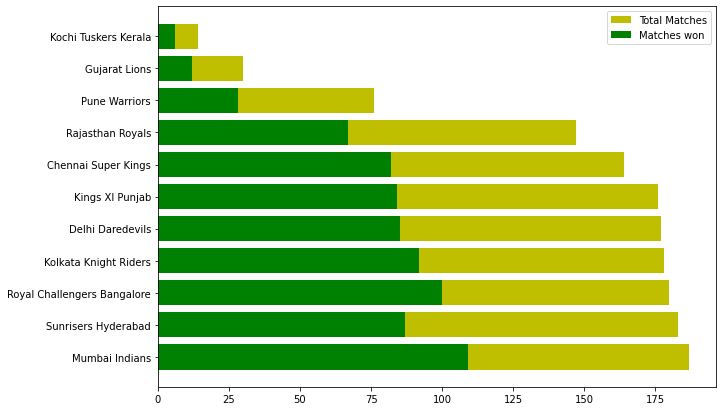

In [536]:
fig = plt.subplots(figsize =(10, 7));
p1=plt.barh(Total_matches1.index,Total_matches1['Total Matches'],color='y'); 
p2=plt.barh(Total_matches1.index,Total_matches1['Matches won'],color='g');
plt.legend((p1[0], p2[0]), ('Total Matches', 'Matches won'));

# Umpires Appearance in matches

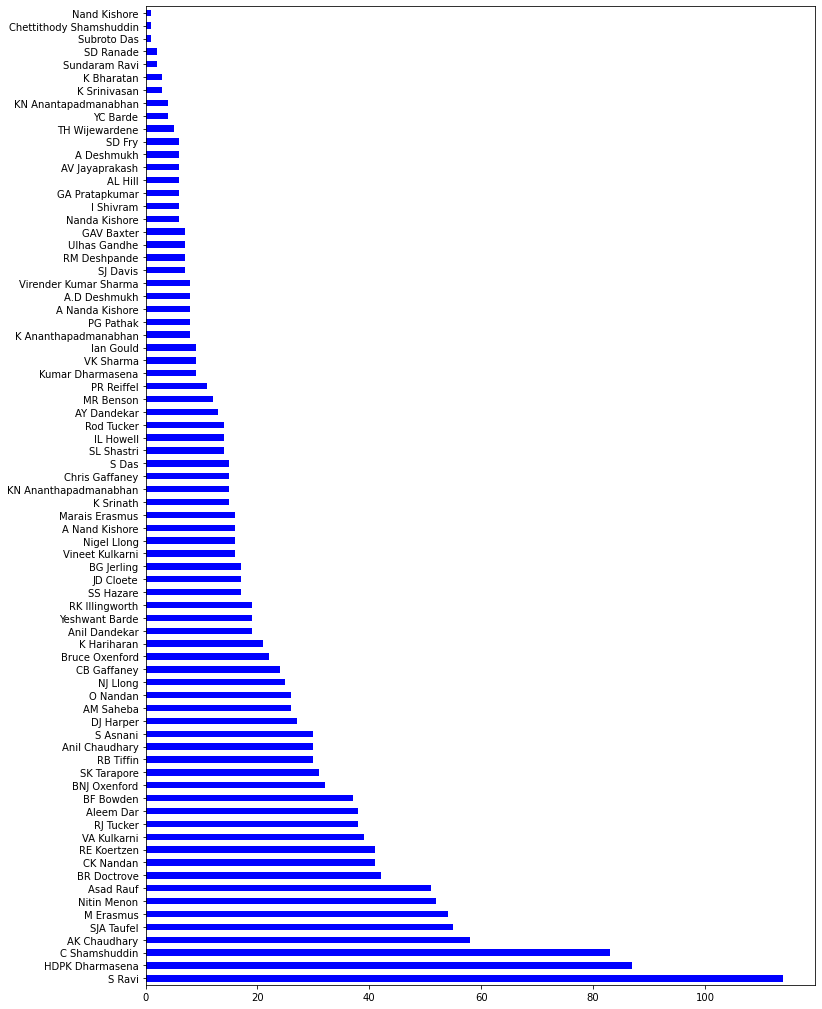

In [537]:
umpire=pd.concat([Matches_IPL_all['umpire1'],Matches_IPL_all['umpire2'],Matches_IPL_all['umpire3']])
umpire=umpire.value_counts()
umpire.plot(kind='barh', figsize=(12, 18),alpha = 1, color=('blue'));

# Man Of the match player wise

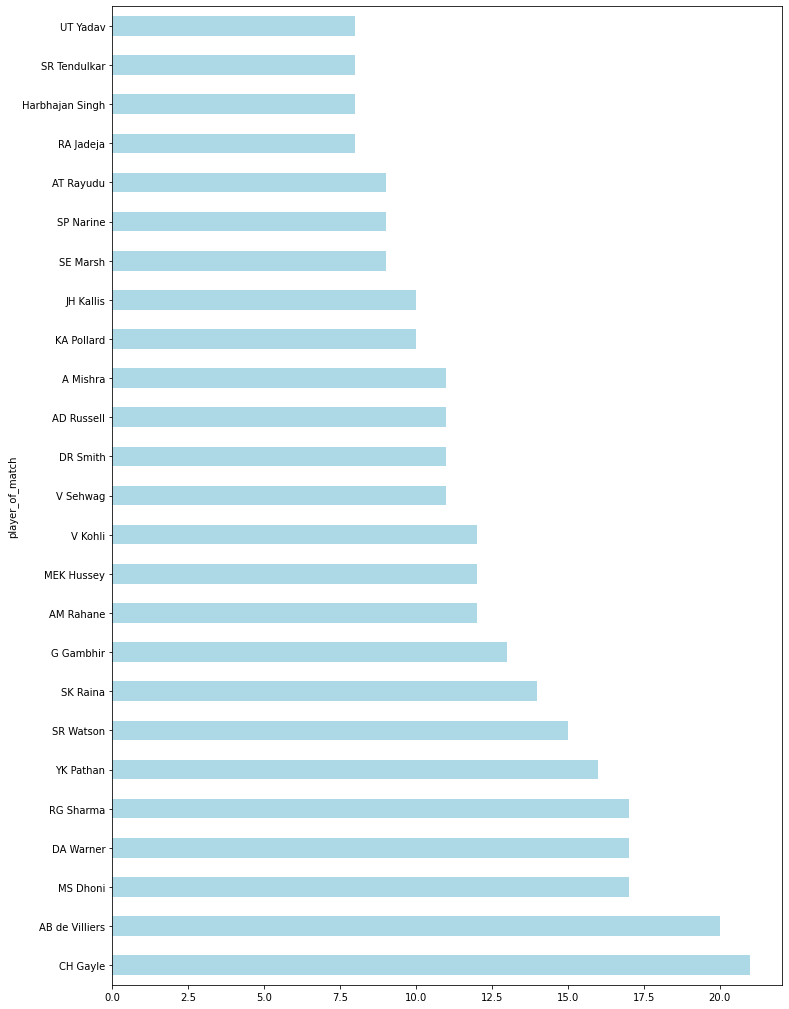

In [538]:
prev_match1=Matches_IPL_all.copy()
player_of_match=prev_match1.groupby('player_of_match')['player_of_match'].agg('count').sort_values(ascending=False)
player_of_match_less_than_10=player_of_match[player_of_match<=7]
prev_match1['player_of_match']=prev_match1['player_of_match'].apply(lambda x: 'others' if x in player_of_match_less_than_10 else x)
prev_match1.drop(index=prev_match1[prev_match1.player_of_match=='others'].index, inplace=True)
prev_match1.groupby('player_of_match')['player_of_match'].agg('count').sort_values(ascending=False).plot(kind='barh', figsize=(12, 18), color=('lightblue'));

# Heat Map

In [539]:
train_heat = pd.DataFrame(train,columns=x_train.columns)

In [540]:
numerical_col = train_heat.select_dtypes(["float64","int64"]).columns

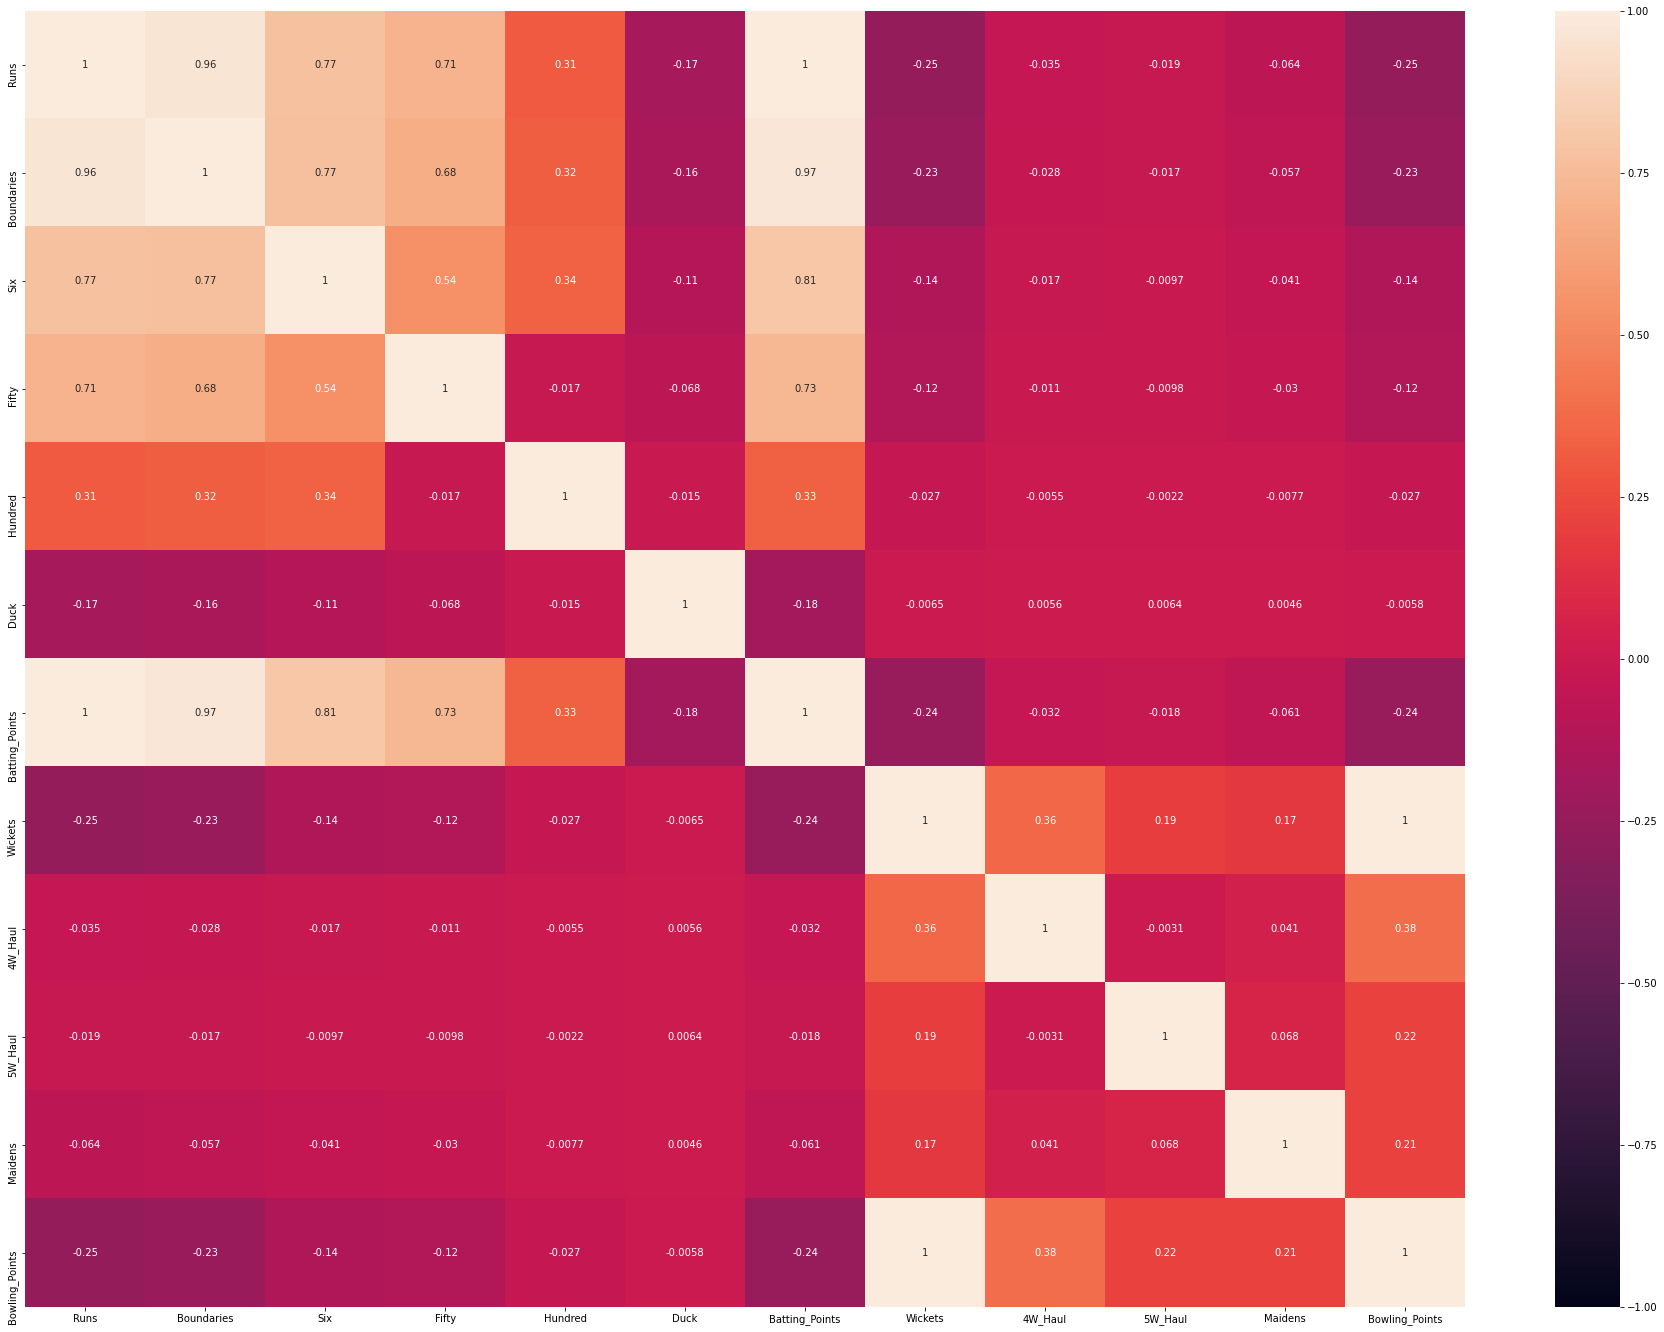

In [541]:
fig = plt.figure(figsize=(25,18))

fig.add_axes([0,0,1,1])
ax = fig.get_axes()[0]

corr_mat = train_heat[numerical_col].corr()

sns.heatmap(corr_mat,ax=ax,vmin=-1,vmax=1,annot=True)
# plt.savefig("./heatmap.jpg", bbox_inches="tight")

plt.show()

# Dropping Columns

In [542]:
len(train["Id"].value_counts())

15916

In [543]:
train.drop(columns=["Id"],inplace=True)

In [544]:
train["Runs"].value_counts()

0      5541
1       843
2       546
4       439
6       399
       ... 
116       1
127       1
120       1
128       1
175       1
Name: Runs, Length: 129, dtype: int64

In [545]:
train

,Runs,Boundaries,Six,Fifty,Hundred,Duck,Batting_Points,Wickets,4W_Haul,5W_Haul,Maidens,Bowling_Points,Total Points
0,0,0,0,0,0,0,0,1,0,0,0,25,25
1,16,1,1,0,0,0,19,1,0,0,0,25,44
2,31,5,1,0,0,0,38,0,0,0,0,0,38
3,24,5,0,0,0,0,29,0,0,0,0,0,29
4,62,10,3,1,0,0,86,0,0,0,0,0,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15911,9,1,0,0,0,0,10,0,0,0,0,0,10
15912,0,0,0,0,0,0,0,0,0,0,0,0,0
15913,15,2,1,0,0,0,19,0,0,0,0,0,19
15914,2,0,0,0,0,0,2,2,0,0,0,50,52


# Spliting Data

In [546]:
y = train["Total Points"]
train.drop(columns="Total Points",inplace=True)

In [547]:
x_train = train[:14633]
y_train = y[:14633]
x_test = train[14633:]
y_test = y[14633:]

In [548]:
# from sklearn.model_selection import train_test_split
# x_train,x_test,y_train,y_test = train_test_split(train,y,test_size=0.2,random_state=0)

In [549]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((14633, 12), (14633,), (1283, 12), (1283,))

In [550]:
from sklearn.metrics import r2_score, mean_squared_error

In [551]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [552]:
train.isnull().sum()

Runs              0
Boundaries        0
Six               0
Fifty             0
Hundred           0
Duck              0
Batting_Points    0
Wickets           0
4W_Haul           0
5W_Haul           0
Maidens           0
Bowling_Points    0
dtype: int64

In [553]:
sc = MinMaxScaler()

In [554]:
train = sc.fit_transform(x_train)
test = sc.transform(x_test)

In [555]:
train.shape

(14633, 12)

In [556]:
test.shape

(1283, 12)

# Models Building

#### XGBoost

In [557]:
y_train.unique()

array([ 25,  44,  38,  29,  86,  39,  34,  33,   1,  50,  43,  26,  19,
        69,  -2,  28,  22,  45, 108,  49,  41,  13,   3,   0,  35,   7,
        23,  10,  75,  83,  73, 131,  17,  59,  96,  21,   5,  18,  53,
        37,   8,  32,  63,  97,  15,  12,  14,  55,  80,  79,  51,  16,
        66, 102,  36,   6,  72,  88, 109,   2,  58, 127,   9,  31, 141,
        76,  54,  46,  62,  27,   4,  24,  56,  30,  91,  68,  81,  48,
        52,  42,  93,  11,  64,  95,  87,  71,  77,  40,  90,  57,  82,
       103, 111, 118,  20, 146, 107,  47, 138,  94, 120,  84, 112,  70,
        60, 176, 144,  92, 122, 124, 149, 106,  67, 130, 143,  61,  65,
       125,  74,  89, 121,  78, 223, 123, 167, 104, 165, 133, 164, 100,
       166, 116, 101, 175, 152, 172, 163, 119, 128, 113,  85,  98, 147,
       142, 148, 154, 157, 156, 151,  99, 115, 145, 184, 126, 161, 105,
       137, 214, 201, 235, 139, 199, 198, 117, 114, 134, 190, 305, 129,
       150, 158, 110, 135, 153, 227, 136, 174, 132, 181, 180, 19

In [558]:
from xgboost import XGBClassifier,XGBRFClassifier,XGBRegressor

## Classifier

In [559]:
xgb = XGBClassifier(max_depth=12,n_estimators=600)
# reg_alpha : float (xgb's alpha)
#         L1 regularization term on weights
# reg_lambda : float (xgb's lambda)
#         L2 regularization term on weights

In [560]:
xgb.fit(train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=600, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [561]:
xgb.score(train,y_train)

0.9977448233444953

In [562]:
y_xgb = xgb.predict(test)

In [563]:
y_test.shape

(1283,)

In [564]:
r2_score(y_xgb,y_test)

0.9693103154485974

In [565]:
np.sum(y_test==y_xgb)/x_test.shape[0]*100

97.34996102883866

<AxesSubplot:>

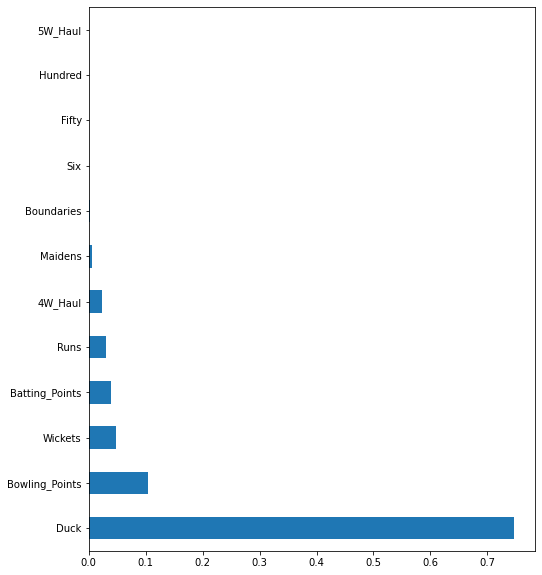

In [566]:
feat_imp = pd.Series(xgb.feature_importances_, index=x_train.columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(8,10))

## Regression

In [567]:
xgbr = XGBRegressor(max_depth=10,n_estimators=600,random_state=42)

In [568]:
xgbr.fit(train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=600, n_jobs=0, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [569]:
xgbr.score(train,y_train)

0.9999999978659295

In [570]:
y_xgbr = xgbr.predict(test)

In [571]:
r2_score(y_xgbr,y_test)

0.9986723471782178

<AxesSubplot:>

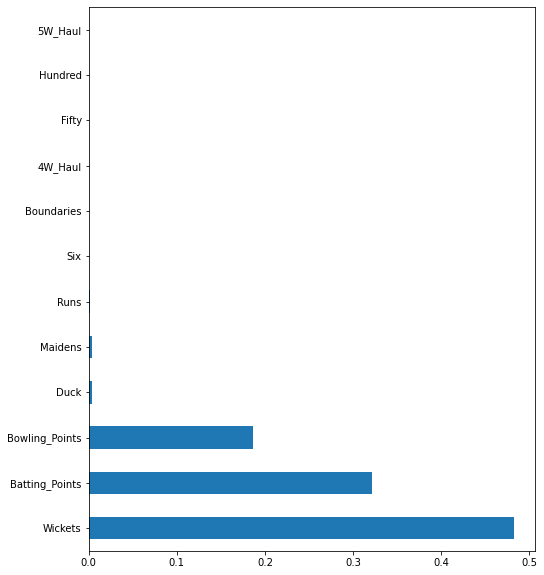

In [572]:
feat_imp = pd.Series(xgbr.feature_importances_, index=x_train.columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(8,10))

#### LGBM

In [573]:
from lightgbm import LGBMClassifier,LGBMRegressor

In [574]:
lgbm = LGBMRegressor(max_depth=10,n_estimators=400,random_state=42)
# reg_alpha=0.0,
# reg_lambda=0.0,
# num_leaves

In [575]:
lgbm.fit(train,y_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


LGBMRegressor(max_depth=10, n_estimators=400, random_state=42)

In [576]:
lgbm.score(train,y_train)

0.9992897915027548

In [577]:
y_lgbm = lgbm.predict(test)

In [578]:
r2_score(y_lgbm,y_test)

0.9987763029516928

<AxesSubplot:>

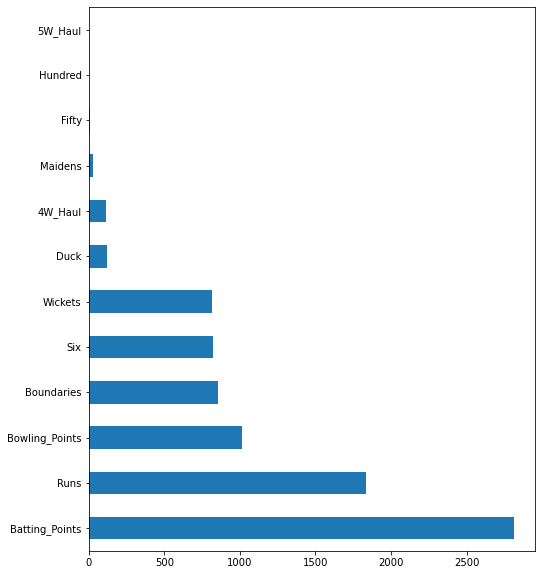

In [579]:
feat_imp = pd.Series(lgbm.feature_importances_, index=x_train.columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(8,10))

#### Catboost

In [580]:
from catboost import CatBoostClassifier,CatBoostRegressor

In [581]:
cat = CatBoostRegressor(iterations=100,depth=2,random_seed=42)
# iterations=None,
#     learning_rate=None,
#     depth=None,
#     l2_leaf_reg=None,

In [582]:
cat.fit(train,y_train)

Learning rate set to 0.362101
0:	learn: 23.3056656	total: 3.38ms	remaining: 334ms
1:	learn: 19.0840287	total: 6.51ms	remaining: 319ms
2:	learn: 15.4733626	total: 10.6ms	remaining: 344ms
3:	learn: 13.2936581	total: 14ms	remaining: 336ms
4:	learn: 11.0652997	total: 16.9ms	remaining: 322ms
5:	learn: 9.5569768	total: 19.8ms	remaining: 311ms
6:	learn: 8.2978650	total: 22.7ms	remaining: 301ms
7:	learn: 7.1723534	total: 25.7ms	remaining: 296ms
8:	learn: 6.4314878	total: 28.2ms	remaining: 285ms
9:	learn: 5.6757014	total: 31.1ms	remaining: 280ms
10:	learn: 5.1924176	total: 33.6ms	remaining: 271ms
11:	learn: 4.7882084	total: 35.9ms	remaining: 264ms
12:	learn: 4.4395956	total: 38.3ms	remaining: 256ms
13:	learn: 4.1614893	total: 40.4ms	remaining: 248ms
14:	learn: 3.9548611	total: 42.8ms	remaining: 242ms
15:	learn: 3.7941696	total: 45.1ms	remaining: 237ms
16:	learn: 3.6446774	total: 47.3ms	remaining: 231ms
17:	learn: 3.5523206	total: 49.6ms	remaining: 226ms
18:	learn: 3.4580201	total: 51.9ms	remain

In [583]:
cat.score(train,y_train)

0.998581293077054

In [584]:
y_cat = cat.predict(test)

In [585]:
r2_score(y_cat,y_test)

0.9984254455664221

<AxesSubplot:>

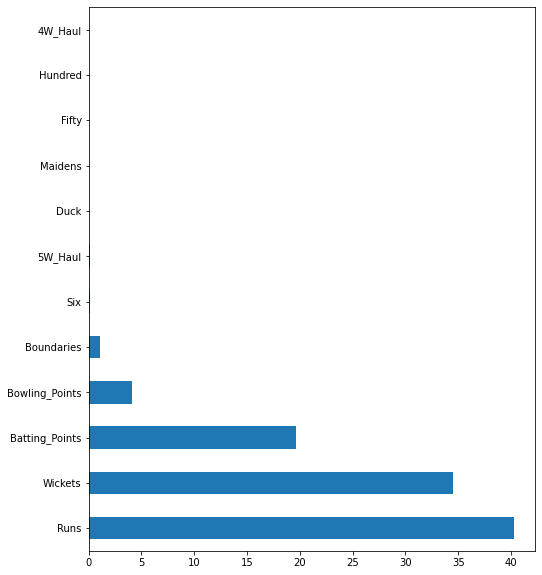

In [586]:
feat_imp = pd.Series(cat.feature_importances_, index=x_train.columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(8,10))

# Ensemble

In [591]:
y_ensemble = 0.1*y_cat + 0.2*y_xgbr+0.7*y_lgbm

In [592]:
r2_score(y_ensemble,y_test)

0.9991082004354946

# Results After Dealing With Correlation

In [593]:
train = pd.DataFrame(train,columns=x_train.columns)

In [594]:
train.drop(columns=["Boundaries","Wickets","Batting_Points"],inplace=True)

In [595]:
test = pd.DataFrame(test,columns=x_test.columns)

In [596]:

test.drop(columns=["Boundaries","Wickets","Batting_Points"],inplace=True)

In [597]:
train

,Runs,Six,Fifty,Hundred,Duck,4W_Haul,5W_Haul,Maidens,Bowling_Points
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.150602
1,0.091429,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.150602
2,0.177143,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.137143,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.354286,0.176471,1.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
14628,0.062857,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
14629,0.154286,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
14630,0.097143,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
14631,0.182857,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [598]:
test

,Runs,Six,Fifty,Hundred,Duck,4W_Haul,5W_Haul,Maidens,Bowling_Points
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.150602
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.150602
3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.131429,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
1278,0.051429,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1279,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1280,0.085714,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1281,0.011429,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.301205


#### XGBoost

In [599]:
xgbr = XGBRegressor(max_depth=2,n_estimators=200,random_state=42)

In [600]:
xgbr.fit(train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [601]:
xgbr.score(train,y_train)

0.9989130562088069

In [602]:
y_xgbr_cor = xgbr.predict(test)

In [603]:
y_xgbr_cor.shape

(1283,)

In [604]:
r2_score(y_xgbr_cor,y_test)

0.9987005771389198

<AxesSubplot:>

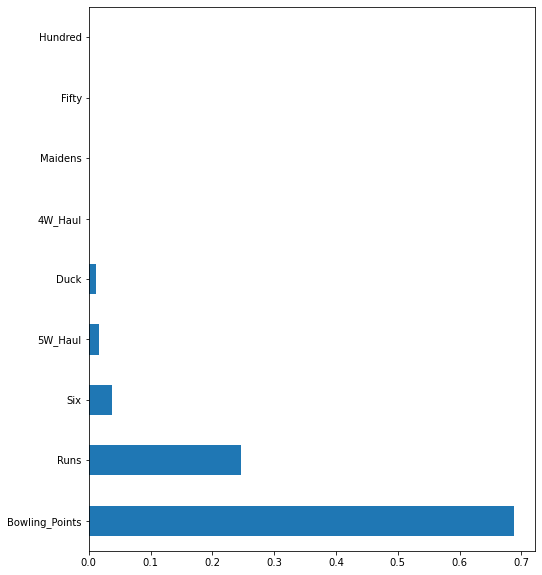

In [605]:
feat_imp = pd.Series(xgbr.feature_importances_, index=train.columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(8,10))

#### LGBM

In [606]:
from lightgbm import LGBMClassifier,LGBMRegressor

In [607]:
lgbm = LGBMRegressor(max_depth=12,n_estimators=600,reg_lambda=0.3,num_leaves=32,reg_alpha=0.3,random_state=42)
# reg_alpha=0.0,
# reg_lambda=0.0,
# num_leaves

In [608]:
lgbm.fit(train,y_train)

LGBMRegressor(max_depth=12, n_estimators=600, num_leaves=32, random_state=42,
              reg_alpha=0.3, reg_lambda=0.3)

In [609]:
lgbm.score(train,y_train)

0.9987495874940077

In [610]:
y_lgbm_cor = lgbm.predict(test)

In [611]:
r2_score(y_lgbm_cor,y_test)

0.9981765716723673

<AxesSubplot:>

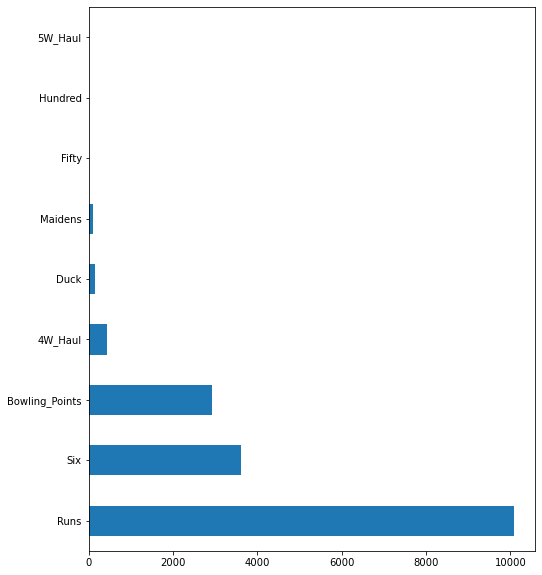

In [612]:
feat_imp = pd.Series(lgbm.feature_importances_, index=train.columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(8,10))

#### Catboost

In [613]:
from catboost import CatBoostClassifier,CatBoostRegressor

In [664]:
cat = CatBoostRegressor(iterations=7000,depth=2,random_seed=42)
# iterations=None,
#     learning_rate=None,
#     depth=None,
#     l2_leaf_reg=None,

In [665]:
cat.fit(train,y_train)

Learning rate set to 0.01434
0:	learn: 29.7275327	total: 10.3ms	remaining: 1m 11s
1:	learn: 29.4484326	total: 15.5ms	remaining: 54.3s
2:	learn: 29.1721125	total: 19.4ms	remaining: 45.3s
3:	learn: 28.9057028	total: 22.4ms	remaining: 39.2s
4:	learn: 28.6379835	total: 25.6ms	remaining: 35.8s
5:	learn: 28.3737005	total: 28.3ms	remaining: 32.9s
6:	learn: 28.1185477	total: 30.7ms	remaining: 30.7s
7:	learn: 27.8642170	total: 33.1ms	remaining: 28.9s
8:	learn: 27.6203802	total: 35.2ms	remaining: 27.4s
9:	learn: 27.3789291	total: 37.4ms	remaining: 26.1s
10:	learn: 27.1421583	total: 39.6ms	remaining: 25.2s
11:	learn: 26.9028451	total: 41.8ms	remaining: 24.3s
12:	learn: 26.6665106	total: 43.9ms	remaining: 23.6s
13:	learn: 26.4432406	total: 46ms	remaining: 22.9s
14:	learn: 26.2223370	total: 48ms	remaining: 22.3s
15:	learn: 25.9918261	total: 50ms	remaining: 21.8s
16:	learn: 25.7774014	total: 52.2ms	remaining: 21.4s
17:	learn: 25.5632201	total: 54.8ms	remaining: 21.3s
18:	learn: 25.3459579	total: 57.

157:	learn: 10.0367442	total: 431ms	remaining: 18.7s
158:	learn: 9.9804262	total: 434ms	remaining: 18.7s
159:	learn: 9.9141591	total: 437ms	remaining: 18.7s
160:	learn: 9.8598907	total: 440ms	remaining: 18.7s
161:	learn: 9.7952394	total: 442ms	remaining: 18.7s
162:	learn: 9.7437099	total: 445ms	remaining: 18.7s
163:	learn: 9.6794285	total: 448ms	remaining: 18.7s
164:	learn: 9.6301345	total: 450ms	remaining: 18.7s
165:	learn: 9.5827940	total: 453ms	remaining: 18.6s
166:	learn: 9.5195641	total: 455ms	remaining: 18.6s
167:	learn: 9.4705560	total: 458ms	remaining: 18.6s
168:	learn: 9.4218342	total: 460ms	remaining: 18.6s
169:	learn: 9.3728247	total: 463ms	remaining: 18.6s
170:	learn: 9.3270975	total: 466ms	remaining: 18.6s
171:	learn: 9.2813354	total: 469ms	remaining: 18.6s
172:	learn: 9.2329238	total: 472ms	remaining: 18.6s
173:	learn: 9.1853696	total: 474ms	remaining: 18.6s
174:	learn: 9.1268855	total: 477ms	remaining: 18.6s
175:	learn: 9.0796780	total: 480ms	remaining: 18.6s
176:	learn:

343:	learn: 4.0355715	total: 1.04s	remaining: 20.1s
344:	learn: 4.0209478	total: 1.04s	remaining: 20.1s
345:	learn: 4.0065202	total: 1.05s	remaining: 20.1s
346:	learn: 3.9920571	total: 1.05s	remaining: 20.1s
347:	learn: 3.9778990	total: 1.05s	remaining: 20.1s
348:	learn: 3.9613286	total: 1.05s	remaining: 20.1s
349:	learn: 3.9480772	total: 1.06s	remaining: 20.1s
350:	learn: 3.9319362	total: 1.06s	remaining: 20.1s
351:	learn: 3.9144911	total: 1.06s	remaining: 20.1s
352:	learn: 3.8999488	total: 1.07s	remaining: 20.1s
353:	learn: 3.8807558	total: 1.07s	remaining: 20.1s
354:	learn: 3.8653307	total: 1.07s	remaining: 20.1s
355:	learn: 3.8522946	total: 1.08s	remaining: 20.1s
356:	learn: 3.8332723	total: 1.08s	remaining: 20.1s
357:	learn: 3.8193499	total: 1.08s	remaining: 20.1s
358:	learn: 3.8054770	total: 1.09s	remaining: 20.1s
359:	learn: 3.7913626	total: 1.09s	remaining: 20.1s
360:	learn: 3.7776210	total: 1.09s	remaining: 20.1s
361:	learn: 3.7593459	total: 1.09s	remaining: 20.1s
362:	learn: 

566:	learn: 1.9256705	total: 1.67s	remaining: 18.9s
567:	learn: 1.9204300	total: 1.67s	remaining: 18.9s
568:	learn: 1.9158601	total: 1.67s	remaining: 18.9s
569:	learn: 1.9106792	total: 1.68s	remaining: 18.9s
570:	learn: 1.9053219	total: 1.68s	remaining: 18.9s
571:	learn: 1.9014471	total: 1.68s	remaining: 18.9s
572:	learn: 1.8929273	total: 1.68s	remaining: 18.9s
573:	learn: 1.8882188	total: 1.68s	remaining: 18.9s
574:	learn: 1.8820915	total: 1.69s	remaining: 18.9s
575:	learn: 1.8782159	total: 1.69s	remaining: 18.8s
576:	learn: 1.8735983	total: 1.69s	remaining: 18.8s
577:	learn: 1.8690010	total: 1.69s	remaining: 18.8s
578:	learn: 1.8621442	total: 1.7s	remaining: 18.8s
579:	learn: 1.8589285	total: 1.7s	remaining: 18.8s
580:	learn: 1.8552401	total: 1.7s	remaining: 18.8s
581:	learn: 1.8521005	total: 1.7s	remaining: 18.8s
582:	learn: 1.8471079	total: 1.71s	remaining: 18.8s
583:	learn: 1.8389472	total: 1.71s	remaining: 18.8s
584:	learn: 1.8352599	total: 1.71s	remaining: 18.8s
585:	learn: 1.83

792:	learn: 1.2235335	total: 2.15s	remaining: 16.9s
793:	learn: 1.2228479	total: 2.16s	remaining: 16.9s
794:	learn: 1.2207491	total: 2.16s	remaining: 16.9s
795:	learn: 1.2201899	total: 2.16s	remaining: 16.8s
796:	learn: 1.2191892	total: 2.16s	remaining: 16.8s
797:	learn: 1.2160814	total: 2.17s	remaining: 16.8s
798:	learn: 1.2140471	total: 2.17s	remaining: 16.8s
799:	learn: 1.2121561	total: 2.17s	remaining: 16.8s
800:	learn: 1.2114903	total: 2.17s	remaining: 16.8s
801:	learn: 1.2094347	total: 2.17s	remaining: 16.8s
802:	learn: 1.2087775	total: 2.18s	remaining: 16.8s
803:	learn: 1.2082397	total: 2.18s	remaining: 16.8s
804:	learn: 1.2077067	total: 2.18s	remaining: 16.8s
805:	learn: 1.2046941	total: 2.18s	remaining: 16.8s
806:	learn: 1.2024492	total: 2.19s	remaining: 16.8s
807:	learn: 1.2019189	total: 2.19s	remaining: 16.8s
808:	learn: 1.2013933	total: 2.19s	remaining: 16.8s
809:	learn: 1.1992688	total: 2.19s	remaining: 16.8s
810:	learn: 1.1964666	total: 2.19s	remaining: 16.8s
811:	learn: 

980:	learn: 1.0161724	total: 2.62s	remaining: 16.1s
981:	learn: 1.0153240	total: 2.62s	remaining: 16.1s
982:	learn: 1.0143425	total: 2.63s	remaining: 16.1s
983:	learn: 1.0133996	total: 2.63s	remaining: 16.1s
984:	learn: 1.0125022	total: 2.63s	remaining: 16.1s
985:	learn: 1.0122639	total: 2.63s	remaining: 16.1s
986:	learn: 1.0107739	total: 2.64s	remaining: 16.1s
987:	learn: 1.0104862	total: 2.64s	remaining: 16.1s
988:	learn: 1.0098257	total: 2.65s	remaining: 16.1s
989:	learn: 1.0095934	total: 2.65s	remaining: 16.1s
990:	learn: 1.0081426	total: 2.65s	remaining: 16.1s
991:	learn: 1.0079122	total: 2.65s	remaining: 16.1s
992:	learn: 1.0066870	total: 2.66s	remaining: 16.1s
993:	learn: 1.0057553	total: 2.66s	remaining: 16.1s
994:	learn: 1.0048768	total: 2.66s	remaining: 16.1s
995:	learn: 1.0046489	total: 2.67s	remaining: 16.1s
996:	learn: 1.0040105	total: 2.67s	remaining: 16.1s
997:	learn: 1.0034169	total: 2.67s	remaining: 16.1s
998:	learn: 1.0026566	total: 2.68s	remaining: 16.1s
999:	learn: 

1156:	learn: 0.9239124	total: 3.09s	remaining: 15.6s
1157:	learn: 0.9237823	total: 3.09s	remaining: 15.6s
1158:	learn: 0.9233854	total: 3.09s	remaining: 15.6s
1159:	learn: 0.9227456	total: 3.1s	remaining: 15.6s
1160:	learn: 0.9223571	total: 3.1s	remaining: 15.6s
1161:	learn: 0.9219982	total: 3.1s	remaining: 15.6s
1162:	learn: 0.9216435	total: 3.1s	remaining: 15.6s
1163:	learn: 0.9212699	total: 3.11s	remaining: 15.6s
1164:	learn: 0.9209273	total: 3.11s	remaining: 15.6s
1165:	learn: 0.9208243	total: 3.11s	remaining: 15.6s
1166:	learn: 0.9203873	total: 3.11s	remaining: 15.6s
1167:	learn: 0.9197502	total: 3.12s	remaining: 15.6s
1168:	learn: 0.9193881	total: 3.12s	remaining: 15.6s
1169:	learn: 0.9192307	total: 3.12s	remaining: 15.6s
1170:	learn: 0.9188778	total: 3.12s	remaining: 15.5s
1171:	learn: 0.9187775	total: 3.13s	remaining: 15.5s
1172:	learn: 0.9182914	total: 3.13s	remaining: 15.5s
1173:	learn: 0.9181374	total: 3.13s	remaining: 15.5s
1174:	learn: 0.9180390	total: 3.13s	remaining: 15.

1380:	learn: 0.8750961	total: 3.57s	remaining: 14.5s
1381:	learn: 0.8750015	total: 3.58s	remaining: 14.5s
1382:	learn: 0.8748674	total: 3.58s	remaining: 14.5s
1383:	learn: 0.8746545	total: 3.58s	remaining: 14.5s
1384:	learn: 0.8745993	total: 3.58s	remaining: 14.5s
1385:	learn: 0.8744225	total: 3.58s	remaining: 14.5s
1386:	learn: 0.8741785	total: 3.59s	remaining: 14.5s
1387:	learn: 0.8741433	total: 3.59s	remaining: 14.5s
1388:	learn: 0.8740072	total: 3.59s	remaining: 14.5s
1389:	learn: 0.8739648	total: 3.59s	remaining: 14.5s
1390:	learn: 0.8738660	total: 3.6s	remaining: 14.5s
1391:	learn: 0.8738319	total: 3.6s	remaining: 14.5s
1392:	learn: 0.8736221	total: 3.6s	remaining: 14.5s
1393:	learn: 0.8733893	total: 3.6s	remaining: 14.5s
1394:	learn: 0.8732578	total: 3.6s	remaining: 14.5s
1395:	learn: 0.8732056	total: 3.61s	remaining: 14.5s
1396:	learn: 0.8730734	total: 3.61s	remaining: 14.5s
1397:	learn: 0.8729691	total: 3.61s	remaining: 14.5s
1398:	learn: 0.8729362	total: 3.61s	remaining: 14.5

1616:	learn: 0.8554497	total: 4.06s	remaining: 13.5s
1617:	learn: 0.8553510	total: 4.06s	remaining: 13.5s
1618:	learn: 0.8552762	total: 4.06s	remaining: 13.5s
1619:	learn: 0.8552410	total: 4.07s	remaining: 13.5s
1620:	learn: 0.8552099	total: 4.07s	remaining: 13.5s
1621:	learn: 0.8551280	total: 4.07s	remaining: 13.5s
1622:	learn: 0.8550606	total: 4.07s	remaining: 13.5s
1623:	learn: 0.8549950	total: 4.08s	remaining: 13.5s
1624:	learn: 0.8549577	total: 4.08s	remaining: 13.5s
1625:	learn: 0.8549457	total: 4.08s	remaining: 13.5s
1626:	learn: 0.8549148	total: 4.08s	remaining: 13.5s
1627:	learn: 0.8548659	total: 4.08s	remaining: 13.5s
1628:	learn: 0.8547563	total: 4.09s	remaining: 13.5s
1629:	learn: 0.8547242	total: 4.09s	remaining: 13.5s
1630:	learn: 0.8546010	total: 4.09s	remaining: 13.5s
1631:	learn: 0.8545867	total: 4.09s	remaining: 13.5s
1632:	learn: 0.8545752	total: 4.09s	remaining: 13.5s
1633:	learn: 0.8545575	total: 4.1s	remaining: 13.5s
1634:	learn: 0.8544942	total: 4.1s	remaining: 1

1847:	learn: 0.8442943	total: 4.53s	remaining: 12.6s
1848:	learn: 0.8442337	total: 4.54s	remaining: 12.6s
1849:	learn: 0.8442188	total: 4.54s	remaining: 12.6s
1850:	learn: 0.8441866	total: 4.54s	remaining: 12.6s
1851:	learn: 0.8438265	total: 4.54s	remaining: 12.6s
1852:	learn: 0.8437657	total: 4.54s	remaining: 12.6s
1853:	learn: 0.8437121	total: 4.55s	remaining: 12.6s
1854:	learn: 0.8436938	total: 4.55s	remaining: 12.6s
1855:	learn: 0.8436346	total: 4.55s	remaining: 12.6s
1856:	learn: 0.8436059	total: 4.55s	remaining: 12.6s
1857:	learn: 0.8435454	total: 4.56s	remaining: 12.6s
1858:	learn: 0.8434825	total: 4.56s	remaining: 12.6s
1859:	learn: 0.8431580	total: 4.56s	remaining: 12.6s
1860:	learn: 0.8431494	total: 4.56s	remaining: 12.6s
1861:	learn: 0.8430917	total: 4.57s	remaining: 12.6s
1862:	learn: 0.8430583	total: 4.57s	remaining: 12.6s
1863:	learn: 0.8430384	total: 4.57s	remaining: 12.6s
1864:	learn: 0.8429863	total: 4.57s	remaining: 12.6s
1865:	learn: 0.8429616	total: 4.57s	remaining:

2003:	learn: 0.8344841	total: 4.85s	remaining: 12.1s
2004:	learn: 0.8344745	total: 4.86s	remaining: 12.1s
2005:	learn: 0.8344571	total: 4.86s	remaining: 12.1s
2006:	learn: 0.8344531	total: 4.86s	remaining: 12.1s
2007:	learn: 0.8344390	total: 4.87s	remaining: 12.1s
2008:	learn: 0.8341871	total: 4.87s	remaining: 12.1s
2009:	learn: 0.8341386	total: 4.87s	remaining: 12.1s
2010:	learn: 0.8340975	total: 4.87s	remaining: 12.1s
2011:	learn: 0.8340767	total: 4.87s	remaining: 12.1s
2012:	learn: 0.8340662	total: 4.88s	remaining: 12.1s
2013:	learn: 0.8338139	total: 4.88s	remaining: 12.1s
2014:	learn: 0.8337827	total: 4.88s	remaining: 12.1s
2015:	learn: 0.8337252	total: 4.88s	remaining: 12.1s
2016:	learn: 0.8337124	total: 4.89s	remaining: 12.1s
2017:	learn: 0.8336463	total: 4.89s	remaining: 12.1s
2018:	learn: 0.8333999	total: 4.89s	remaining: 12.1s
2019:	learn: 0.8333611	total: 4.89s	remaining: 12.1s
2020:	learn: 0.8333358	total: 4.89s	remaining: 12.1s
2021:	learn: 0.8333177	total: 4.9s	remaining: 

2185:	learn: 0.8231423	total: 5.51s	remaining: 12.1s
2186:	learn: 0.8231040	total: 5.52s	remaining: 12.1s
2187:	learn: 0.8230937	total: 5.53s	remaining: 12.2s
2188:	learn: 0.8229896	total: 5.53s	remaining: 12.2s
2189:	learn: 0.8228192	total: 5.53s	remaining: 12.2s
2190:	learn: 0.8226488	total: 5.54s	remaining: 12.2s
2191:	learn: 0.8226320	total: 5.55s	remaining: 12.2s
2192:	learn: 0.8225999	total: 5.55s	remaining: 12.2s
2193:	learn: 0.8225816	total: 5.55s	remaining: 12.2s
2194:	learn: 0.8223962	total: 5.56s	remaining: 12.2s
2195:	learn: 0.8223608	total: 5.56s	remaining: 12.2s
2196:	learn: 0.8223524	total: 5.57s	remaining: 12.2s
2197:	learn: 0.8223475	total: 5.57s	remaining: 12.2s
2198:	learn: 0.8223186	total: 5.58s	remaining: 12.2s
2199:	learn: 0.8221558	total: 5.58s	remaining: 12.2s
2200:	learn: 0.8219784	total: 5.58s	remaining: 12.2s
2201:	learn: 0.8219700	total: 5.59s	remaining: 12.2s
2202:	learn: 0.8218035	total: 5.59s	remaining: 12.2s
2203:	learn: 0.8217678	total: 5.6s	remaining: 

2373:	learn: 0.8117000	total: 6.33s	remaining: 12.3s
2374:	learn: 0.8116924	total: 6.33s	remaining: 12.3s
2375:	learn: 0.8115880	total: 6.33s	remaining: 12.3s
2376:	learn: 0.8115805	total: 6.34s	remaining: 12.3s
2377:	learn: 0.8115478	total: 6.34s	remaining: 12.3s
2378:	learn: 0.8115025	total: 6.35s	remaining: 12.3s
2379:	learn: 0.8114846	total: 6.35s	remaining: 12.3s
2380:	learn: 0.8114487	total: 6.36s	remaining: 12.3s
2381:	learn: 0.8114411	total: 6.36s	remaining: 12.3s
2382:	learn: 0.8114261	total: 6.37s	remaining: 12.3s
2383:	learn: 0.8114000	total: 6.37s	remaining: 12.3s
2384:	learn: 0.8113925	total: 6.38s	remaining: 12.3s
2385:	learn: 0.8112899	total: 6.38s	remaining: 12.3s
2386:	learn: 0.8112825	total: 6.38s	remaining: 12.3s
2387:	learn: 0.8112762	total: 6.38s	remaining: 12.3s
2388:	learn: 0.8112408	total: 6.39s	remaining: 12.3s
2389:	learn: 0.8112229	total: 6.39s	remaining: 12.3s
2390:	learn: 0.8111959	total: 6.39s	remaining: 12.3s
2391:	learn: 0.8111869	total: 6.39s	remaining:

2586:	learn: 0.8032180	total: 6.79s	remaining: 11.6s
2587:	learn: 0.8032121	total: 6.79s	remaining: 11.6s
2588:	learn: 0.8032062	total: 6.8s	remaining: 11.6s
2589:	learn: 0.8031803	total: 6.8s	remaining: 11.6s
2590:	learn: 0.8031553	total: 6.8s	remaining: 11.6s
2591:	learn: 0.8030729	total: 6.8s	remaining: 11.6s
2592:	learn: 0.8030670	total: 6.8s	remaining: 11.6s
2593:	learn: 0.8030612	total: 6.81s	remaining: 11.6s
2594:	learn: 0.8029808	total: 6.81s	remaining: 11.6s
2595:	learn: 0.8029786	total: 6.81s	remaining: 11.6s
2596:	learn: 0.8029494	total: 6.81s	remaining: 11.6s
2597:	learn: 0.8029244	total: 6.82s	remaining: 11.6s
2598:	learn: 0.8029122	total: 6.82s	remaining: 11.5s
2599:	learn: 0.8029064	total: 6.82s	remaining: 11.5s
2600:	learn: 0.8028906	total: 6.82s	remaining: 11.5s
2601:	learn: 0.8027975	total: 6.83s	remaining: 11.5s
2602:	learn: 0.8027917	total: 6.83s	remaining: 11.5s
2603:	learn: 0.8027323	total: 6.83s	remaining: 11.5s
2604:	learn: 0.8026389	total: 6.83s	remaining: 11.5

2747:	learn: 0.7976822	total: 7.12s	remaining: 11s
2748:	learn: 0.7976682	total: 7.13s	remaining: 11s
2749:	learn: 0.7976664	total: 7.13s	remaining: 11s
2750:	learn: 0.7976420	total: 7.13s	remaining: 11s
2751:	learn: 0.7976256	total: 7.13s	remaining: 11s
2752:	learn: 0.7976017	total: 7.13s	remaining: 11s
2753:	learn: 0.7975631	total: 7.14s	remaining: 11s
2754:	learn: 0.7975161	total: 7.14s	remaining: 11s
2755:	learn: 0.7974368	total: 7.14s	remaining: 11s
2756:	learn: 0.7974309	total: 7.14s	remaining: 11s
2757:	learn: 0.7973737	total: 7.15s	remaining: 11s
2758:	learn: 0.7973597	total: 7.15s	remaining: 11s
2759:	learn: 0.7973569	total: 7.15s	remaining: 11s
2760:	learn: 0.7973012	total: 7.15s	remaining: 11s
2761:	learn: 0.7972963	total: 7.16s	remaining: 11s
2762:	learn: 0.7972884	total: 7.16s	remaining: 11s
2763:	learn: 0.7972341	total: 7.16s	remaining: 11s
2764:	learn: 0.7972322	total: 7.16s	remaining: 11s
2765:	learn: 0.7972279	total: 7.17s	remaining: 11s
2766:	learn: 0.7972182	total: 7

2964:	learn: 0.7914066	total: 7.6s	remaining: 10.3s
2965:	learn: 0.7913418	total: 7.6s	remaining: 10.3s
2966:	learn: 0.7912971	total: 7.6s	remaining: 10.3s
2967:	learn: 0.7912533	total: 7.61s	remaining: 10.3s
2968:	learn: 0.7912505	total: 7.61s	remaining: 10.3s
2969:	learn: 0.7912388	total: 7.61s	remaining: 10.3s
2970:	learn: 0.7912360	total: 7.61s	remaining: 10.3s
2971:	learn: 0.7912333	total: 7.62s	remaining: 10.3s
2972:	learn: 0.7911940	total: 7.62s	remaining: 10.3s
2973:	learn: 0.7911913	total: 7.62s	remaining: 10.3s
2974:	learn: 0.7911887	total: 7.62s	remaining: 10.3s
2975:	learn: 0.7911861	total: 7.63s	remaining: 10.3s
2976:	learn: 0.7911842	total: 7.63s	remaining: 10.3s
2977:	learn: 0.7911817	total: 7.63s	remaining: 10.3s
2978:	learn: 0.7911798	total: 7.63s	remaining: 10.3s
2979:	learn: 0.7911773	total: 7.63s	remaining: 10.3s
2980:	learn: 0.7911754	total: 7.64s	remaining: 10.3s
2981:	learn: 0.7911093	total: 7.64s	remaining: 10.3s
2982:	learn: 0.7910659	total: 7.64s	remaining: 10

3174:	learn: 0.7848049	total: 8.07s	remaining: 9.72s
3175:	learn: 0.7847768	total: 8.07s	remaining: 9.72s
3176:	learn: 0.7847756	total: 8.07s	remaining: 9.71s
3177:	learn: 0.7847390	total: 8.07s	remaining: 9.71s
3178:	learn: 0.7846688	total: 8.08s	remaining: 9.71s
3179:	learn: 0.7846629	total: 8.08s	remaining: 9.71s
3180:	learn: 0.7846299	total: 8.08s	remaining: 9.7s
3181:	learn: 0.7846287	total: 8.09s	remaining: 9.7s
3182:	learn: 0.7846063	total: 8.09s	remaining: 9.7s
3183:	learn: 0.7845571	total: 8.09s	remaining: 9.7s
3184:	learn: 0.7845558	total: 8.09s	remaining: 9.69s
3185:	learn: 0.7845196	total: 8.1s	remaining: 9.69s
3186:	learn: 0.7845185	total: 8.1s	remaining: 9.69s
3187:	learn: 0.7844704	total: 8.1s	remaining: 9.69s
3188:	learn: 0.7844690	total: 8.1s	remaining: 9.68s
3189:	learn: 0.7844679	total: 8.11s	remaining: 9.68s
3190:	learn: 0.7844655	total: 8.11s	remaining: 9.68s
3191:	learn: 0.7844226	total: 8.11s	remaining: 9.68s
3192:	learn: 0.7843869	total: 8.11s	remaining: 9.67s
3

3387:	learn: 0.7801159	total: 8.54s	remaining: 9.11s
3388:	learn: 0.7800869	total: 8.55s	remaining: 9.11s
3389:	learn: 0.7800849	total: 8.55s	remaining: 9.1s
3390:	learn: 0.7800839	total: 8.55s	remaining: 9.1s
3391:	learn: 0.7800791	total: 8.55s	remaining: 9.1s
3392:	learn: 0.7800446	total: 8.55s	remaining: 9.09s
3393:	learn: 0.7800434	total: 8.56s	remaining: 9.09s
3394:	learn: 0.7800425	total: 8.56s	remaining: 9.09s
3395:	learn: 0.7800141	total: 8.56s	remaining: 9.09s
3396:	learn: 0.7799638	total: 8.56s	remaining: 9.08s
3397:	learn: 0.7799439	total: 8.57s	remaining: 9.09s
3398:	learn: 0.7799091	total: 8.57s	remaining: 9.08s
3399:	learn: 0.7798815	total: 8.58s	remaining: 9.08s
3400:	learn: 0.7798761	total: 8.58s	remaining: 9.08s
3401:	learn: 0.7798726	total: 8.58s	remaining: 9.08s
3402:	learn: 0.7798575	total: 8.58s	remaining: 9.07s
3403:	learn: 0.7798238	total: 8.59s	remaining: 9.07s
3404:	learn: 0.7797749	total: 8.59s	remaining: 9.07s
3405:	learn: 0.7797480	total: 8.59s	remaining: 9.

3588:	learn: 0.7768280	total: 9.02s	remaining: 8.57s
3589:	learn: 0.7768048	total: 9.02s	remaining: 8.57s
3590:	learn: 0.7768040	total: 9.02s	remaining: 8.56s
3591:	learn: 0.7767789	total: 9.02s	remaining: 8.56s
3592:	learn: 0.7767598	total: 9.03s	remaining: 8.56s
3593:	learn: 0.7767466	total: 9.03s	remaining: 8.56s
3594:	learn: 0.7767424	total: 9.03s	remaining: 8.55s
3595:	learn: 0.7767403	total: 9.03s	remaining: 8.55s
3596:	learn: 0.7767340	total: 9.04s	remaining: 8.55s
3597:	learn: 0.7767093	total: 9.04s	remaining: 8.55s
3598:	learn: 0.7767072	total: 9.04s	remaining: 8.54s
3599:	learn: 0.7767010	total: 9.04s	remaining: 8.54s
3600:	learn: 0.7766756	total: 9.05s	remaining: 8.54s
3601:	learn: 0.7766737	total: 9.05s	remaining: 8.54s
3602:	learn: 0.7766688	total: 9.05s	remaining: 8.53s
3603:	learn: 0.7766663	total: 9.05s	remaining: 8.53s
3604:	learn: 0.7766574	total: 9.06s	remaining: 8.53s
3605:	learn: 0.7766553	total: 9.06s	remaining: 8.53s
3606:	learn: 0.7766424	total: 9.06s	remaining:

3786:	learn: 0.7732951	total: 9.47s	remaining: 8.04s
3787:	learn: 0.7732828	total: 9.48s	remaining: 8.04s
3788:	learn: 0.7732808	total: 9.48s	remaining: 8.03s
3789:	learn: 0.7732589	total: 9.48s	remaining: 8.03s
3790:	learn: 0.7732468	total: 9.48s	remaining: 8.03s
3791:	learn: 0.7732418	total: 9.49s	remaining: 8.03s
3792:	learn: 0.7732059	total: 9.49s	remaining: 8.02s
3793:	learn: 0.7731939	total: 9.49s	remaining: 8.02s
3794:	learn: 0.7731674	total: 9.49s	remaining: 8.02s
3795:	learn: 0.7731461	total: 9.5s	remaining: 8.02s
3796:	learn: 0.7731342	total: 9.5s	remaining: 8.02s
3797:	learn: 0.7731322	total: 9.5s	remaining: 8.01s
3798:	learn: 0.7731203	total: 9.51s	remaining: 8.01s
3799:	learn: 0.7730339	total: 9.51s	remaining: 8.01s
3800:	learn: 0.7730074	total: 9.51s	remaining: 8.01s
3801:	learn: 0.7729725	total: 9.51s	remaining: 8s
3802:	learn: 0.7729705	total: 9.52s	remaining: 8s
3803:	learn: 0.7729555	total: 9.52s	remaining: 8s
3804:	learn: 0.7729506	total: 9.52s	remaining: 7.99s
3805:

3981:	learn: 0.7693558	total: 9.95s	remaining: 7.54s
3982:	learn: 0.7693315	total: 9.95s	remaining: 7.54s
3983:	learn: 0.7693015	total: 9.95s	remaining: 7.53s
3984:	learn: 0.7692815	total: 9.95s	remaining: 7.53s
3985:	learn: 0.7692797	total: 9.95s	remaining: 7.53s
3986:	learn: 0.7692686	total: 9.96s	remaining: 7.52s
3987:	learn: 0.7692448	total: 9.96s	remaining: 7.52s
3988:	learn: 0.7692406	total: 9.96s	remaining: 7.52s
3989:	learn: 0.7692169	total: 9.96s	remaining: 7.52s
3990:	learn: 0.7692133	total: 9.97s	remaining: 7.51s
3991:	learn: 0.7691986	total: 9.97s	remaining: 7.51s
3992:	learn: 0.7691967	total: 9.97s	remaining: 7.51s
3993:	learn: 0.7691636	total: 9.97s	remaining: 7.51s
3994:	learn: 0.7691562	total: 9.97s	remaining: 7.5s
3995:	learn: 0.7691403	total: 9.98s	remaining: 7.5s
3996:	learn: 0.7690631	total: 9.98s	remaining: 7.5s
3997:	learn: 0.7690444	total: 9.98s	remaining: 7.5s
3998:	learn: 0.7690425	total: 9.98s	remaining: 7.49s
3999:	learn: 0.7690294	total: 9.99s	remaining: 7.4

4199:	learn: 0.7658242	total: 10.4s	remaining: 6.95s
4200:	learn: 0.7658045	total: 10.4s	remaining: 6.94s
4201:	learn: 0.7657834	total: 10.4s	remaining: 6.94s
4202:	learn: 0.7657768	total: 10.4s	remaining: 6.94s
4203:	learn: 0.7657673	total: 10.4s	remaining: 6.94s
4204:	learn: 0.7657666	total: 10.4s	remaining: 6.93s
4205:	learn: 0.7657459	total: 10.4s	remaining: 6.93s
4206:	learn: 0.7657253	total: 10.4s	remaining: 6.93s
4207:	learn: 0.7657100	total: 10.4s	remaining: 6.93s
4208:	learn: 0.7656905	total: 10.4s	remaining: 6.92s
4209:	learn: 0.7656777	total: 10.4s	remaining: 6.92s
4210:	learn: 0.7656648	total: 10.4s	remaining: 6.92s
4211:	learn: 0.7656004	total: 10.5s	remaining: 6.92s
4212:	learn: 0.7655864	total: 10.5s	remaining: 6.92s
4213:	learn: 0.7655629	total: 10.5s	remaining: 6.91s
4214:	learn: 0.7655482	total: 10.5s	remaining: 6.91s
4215:	learn: 0.7655426	total: 10.5s	remaining: 6.91s
4216:	learn: 0.7655386	total: 10.5s	remaining: 6.91s
4217:	learn: 0.7655320	total: 10.5s	remaining:

4355:	learn: 0.7635822	total: 10.8s	remaining: 6.54s
4356:	learn: 0.7635591	total: 10.8s	remaining: 6.54s
4357:	learn: 0.7635475	total: 10.8s	remaining: 6.54s
4358:	learn: 0.7635457	total: 10.8s	remaining: 6.53s
4359:	learn: 0.7635378	total: 10.8s	remaining: 6.53s
4360:	learn: 0.7635364	total: 10.8s	remaining: 6.53s
4361:	learn: 0.7635255	total: 10.8s	remaining: 6.53s
4362:	learn: 0.7634980	total: 10.8s	remaining: 6.52s
4363:	learn: 0.7634816	total: 10.8s	remaining: 6.52s
4364:	learn: 0.7634654	total: 10.8s	remaining: 6.52s
4365:	learn: 0.7634481	total: 10.8s	remaining: 6.52s
4366:	learn: 0.7634409	total: 10.8s	remaining: 6.51s
4367:	learn: 0.7634395	total: 10.8s	remaining: 6.51s
4368:	learn: 0.7634219	total: 10.8s	remaining: 6.51s
4369:	learn: 0.7633951	total: 10.8s	remaining: 6.51s
4370:	learn: 0.7633751	total: 10.8s	remaining: 6.5s
4371:	learn: 0.7633590	total: 10.8s	remaining: 6.5s
4372:	learn: 0.7633488	total: 10.8s	remaining: 6.5s
4373:	learn: 0.7633374	total: 10.8s	remaining: 6.

4575:	learn: 0.7608911	total: 11.2s	remaining: 5.96s
4576:	learn: 0.7608766	total: 11.3s	remaining: 5.96s
4577:	learn: 0.7608679	total: 11.3s	remaining: 5.95s
4578:	learn: 0.7608544	total: 11.3s	remaining: 5.95s
4579:	learn: 0.7608538	total: 11.3s	remaining: 5.95s
4580:	learn: 0.7608338	total: 11.3s	remaining: 5.95s
4581:	learn: 0.7608197	total: 11.3s	remaining: 5.94s
4582:	learn: 0.7608112	total: 11.3s	remaining: 5.94s
4583:	learn: 0.7607948	total: 11.3s	remaining: 5.94s
4584:	learn: 0.7607943	total: 11.3s	remaining: 5.93s
4585:	learn: 0.7607773	total: 11.3s	remaining: 5.93s
4586:	learn: 0.7607701	total: 11.3s	remaining: 5.93s
4587:	learn: 0.7607595	total: 11.3s	remaining: 5.93s
4588:	learn: 0.7607436	total: 11.3s	remaining: 5.92s
4589:	learn: 0.7607217	total: 11.3s	remaining: 5.92s
4590:	learn: 0.7606993	total: 11.3s	remaining: 5.92s
4591:	learn: 0.7606910	total: 11.3s	remaining: 5.92s
4592:	learn: 0.7606743	total: 11.3s	remaining: 5.92s
4593:	learn: 0.7606654	total: 11.3s	remaining:

4759:	learn: 0.7583334	total: 12s	remaining: 5.66s
4760:	learn: 0.7583180	total: 12s	remaining: 5.65s
4761:	learn: 0.7583127	total: 12s	remaining: 5.65s
4762:	learn: 0.7582923	total: 12s	remaining: 5.65s
4763:	learn: 0.7582907	total: 12s	remaining: 5.65s
4764:	learn: 0.7582827	total: 12s	remaining: 5.65s
4765:	learn: 0.7582611	total: 12s	remaining: 5.64s
4766:	learn: 0.7582475	total: 12s	remaining: 5.64s
4767:	learn: 0.7582470	total: 12.1s	remaining: 5.64s
4768:	learn: 0.7582448	total: 12.1s	remaining: 5.64s
4769:	learn: 0.7582201	total: 12.1s	remaining: 5.64s
4770:	learn: 0.7582055	total: 12.1s	remaining: 5.64s
4771:	learn: 0.7581976	total: 12.1s	remaining: 5.63s
4772:	learn: 0.7581971	total: 12.1s	remaining: 5.63s
4773:	learn: 0.7581917	total: 12.1s	remaining: 5.63s
4774:	learn: 0.7581797	total: 12.1s	remaining: 5.63s
4775:	learn: 0.7581441	total: 12.1s	remaining: 5.63s
4776:	learn: 0.7581436	total: 12.1s	remaining: 5.63s
4777:	learn: 0.7581385	total: 12.1s	remaining: 5.63s
4778:	lea

4983:	learn: 0.7557539	total: 12.8s	remaining: 5.19s
4984:	learn: 0.7557410	total: 12.8s	remaining: 5.18s
4985:	learn: 0.7557357	total: 12.8s	remaining: 5.18s
4986:	learn: 0.7557343	total: 12.8s	remaining: 5.18s
4987:	learn: 0.7557275	total: 12.8s	remaining: 5.18s
4988:	learn: 0.7557209	total: 12.8s	remaining: 5.17s
4989:	learn: 0.7557000	total: 12.8s	remaining: 5.17s
4990:	learn: 0.7556873	total: 12.8s	remaining: 5.17s
4991:	learn: 0.7556805	total: 12.8s	remaining: 5.17s
4992:	learn: 0.7556679	total: 12.8s	remaining: 5.16s
4993:	learn: 0.7556565	total: 12.8s	remaining: 5.16s
4994:	learn: 0.7556462	total: 12.8s	remaining: 5.16s
4995:	learn: 0.7556397	total: 12.9s	remaining: 5.15s
4996:	learn: 0.7556314	total: 12.9s	remaining: 5.15s
4997:	learn: 0.7556110	total: 12.9s	remaining: 5.15s
4998:	learn: 0.7555986	total: 12.9s	remaining: 5.15s
4999:	learn: 0.7555981	total: 12.9s	remaining: 5.14s
5000:	learn: 0.7555929	total: 12.9s	remaining: 5.14s
5001:	learn: 0.7555917	total: 12.9s	remaining:

5144:	learn: 0.7541919	total: 13.2s	remaining: 4.74s
5145:	learn: 0.7541742	total: 13.2s	remaining: 4.74s
5146:	learn: 0.7541687	total: 13.2s	remaining: 4.74s
5147:	learn: 0.7541485	total: 13.2s	remaining: 4.73s
5148:	learn: 0.7541390	total: 13.2s	remaining: 4.73s
5149:	learn: 0.7541385	total: 13.2s	remaining: 4.73s
5150:	learn: 0.7541380	total: 13.2s	remaining: 4.72s
5151:	learn: 0.7541376	total: 13.2s	remaining: 4.72s
5152:	learn: 0.7541328	total: 13.2s	remaining: 4.72s
5153:	learn: 0.7541083	total: 13.2s	remaining: 4.72s
5154:	learn: 0.7541069	total: 13.2s	remaining: 4.71s
5155:	learn: 0.7540957	total: 13.2s	remaining: 4.71s
5156:	learn: 0.7540895	total: 13.2s	remaining: 4.71s
5157:	learn: 0.7540813	total: 13.2s	remaining: 4.71s
5158:	learn: 0.7540751	total: 13.2s	remaining: 4.7s
5159:	learn: 0.7540640	total: 13.2s	remaining: 4.7s
5160:	learn: 0.7540584	total: 13.2s	remaining: 4.7s
5161:	learn: 0.7540547	total: 13.2s	remaining: 4.7s
5162:	learn: 0.7540473	total: 13.2s	remaining: 4.6

5299:	learn: 0.7527548	total: 13.5s	remaining: 4.32s
5300:	learn: 0.7527474	total: 13.5s	remaining: 4.32s
5301:	learn: 0.7527201	total: 13.5s	remaining: 4.31s
5302:	learn: 0.7527027	total: 13.5s	remaining: 4.31s
5303:	learn: 0.7526879	total: 13.5s	remaining: 4.31s
5304:	learn: 0.7526875	total: 13.5s	remaining: 4.31s
5305:	learn: 0.7526712	total: 13.5s	remaining: 4.3s
5306:	learn: 0.7526605	total: 13.5s	remaining: 4.3s
5307:	learn: 0.7526563	total: 13.5s	remaining: 4.3s
5308:	learn: 0.7526292	total: 13.5s	remaining: 4.3s
5309:	learn: 0.7526174	total: 13.5s	remaining: 4.29s
5310:	learn: 0.7526141	total: 13.5s	remaining: 4.29s
5311:	learn: 0.7526046	total: 13.5s	remaining: 4.29s
5312:	learn: 0.7526013	total: 13.5s	remaining: 4.29s
5313:	learn: 0.7526000	total: 13.5s	remaining: 4.28s
5314:	learn: 0.7525902	total: 13.5s	remaining: 4.28s
5315:	learn: 0.7525741	total: 13.5s	remaining: 4.28s
5316:	learn: 0.7525632	total: 13.5s	remaining: 4.28s
5317:	learn: 0.7525564	total: 13.5s	remaining: 4.2

5459:	learn: 0.7515320	total: 13.8s	remaining: 3.89s
5460:	learn: 0.7515247	total: 13.8s	remaining: 3.89s
5461:	learn: 0.7515134	total: 13.8s	remaining: 3.89s
5462:	learn: 0.7515106	total: 13.8s	remaining: 3.88s
5463:	learn: 0.7514884	total: 13.8s	remaining: 3.88s
5464:	learn: 0.7514846	total: 13.8s	remaining: 3.88s
5465:	learn: 0.7514790	total: 13.8s	remaining: 3.88s
5466:	learn: 0.7514786	total: 13.8s	remaining: 3.87s
5467:	learn: 0.7514782	total: 13.8s	remaining: 3.87s
5468:	learn: 0.7514757	total: 13.8s	remaining: 3.87s
5469:	learn: 0.7514719	total: 13.8s	remaining: 3.87s
5470:	learn: 0.7514625	total: 13.8s	remaining: 3.87s
5471:	learn: 0.7514537	total: 13.8s	remaining: 3.86s
5472:	learn: 0.7514403	total: 13.8s	remaining: 3.86s
5473:	learn: 0.7514304	total: 13.8s	remaining: 3.86s
5474:	learn: 0.7514243	total: 13.9s	remaining: 3.86s
5475:	learn: 0.7514196	total: 13.9s	remaining: 3.86s
5476:	learn: 0.7514158	total: 13.9s	remaining: 3.85s
5477:	learn: 0.7514129	total: 13.9s	remaining:

5650:	learn: 0.7501507	total: 14.6s	remaining: 3.49s
5651:	learn: 0.7501303	total: 14.6s	remaining: 3.48s
5652:	learn: 0.7501158	total: 14.6s	remaining: 3.48s
5653:	learn: 0.7501106	total: 14.6s	remaining: 3.48s
5654:	learn: 0.7500962	total: 14.6s	remaining: 3.48s
5655:	learn: 0.7500869	total: 14.6s	remaining: 3.48s
5656:	learn: 0.7500670	total: 14.6s	remaining: 3.47s
5657:	learn: 0.7500619	total: 14.6s	remaining: 3.47s
5658:	learn: 0.7500529	total: 14.6s	remaining: 3.47s
5659:	learn: 0.7500456	total: 14.7s	remaining: 3.47s
5660:	learn: 0.7500406	total: 14.7s	remaining: 3.47s
5661:	learn: 0.7500402	total: 14.7s	remaining: 3.46s
5662:	learn: 0.7500399	total: 14.7s	remaining: 3.46s
5663:	learn: 0.7500306	total: 14.7s	remaining: 3.46s
5664:	learn: 0.7500257	total: 14.7s	remaining: 3.46s
5665:	learn: 0.7500183	total: 14.7s	remaining: 3.46s
5666:	learn: 0.7500143	total: 14.7s	remaining: 3.45s
5667:	learn: 0.7500119	total: 14.7s	remaining: 3.45s
5668:	learn: 0.7500033	total: 14.7s	remaining:

5808:	learn: 0.7490126	total: 15.3s	remaining: 3.13s
5809:	learn: 0.7490122	total: 15.3s	remaining: 3.13s
5810:	learn: 0.7490097	total: 15.3s	remaining: 3.12s
5811:	learn: 0.7490094	total: 15.3s	remaining: 3.12s
5812:	learn: 0.7489937	total: 15.3s	remaining: 3.12s
5813:	learn: 0.7489856	total: 15.3s	remaining: 3.11s
5814:	learn: 0.7489718	total: 15.3s	remaining: 3.11s
5815:	learn: 0.7489619	total: 15.3s	remaining: 3.11s
5816:	learn: 0.7489571	total: 15.3s	remaining: 3.11s
5817:	learn: 0.7489568	total: 15.3s	remaining: 3.1s
5818:	learn: 0.7489536	total: 15.3s	remaining: 3.1s
5819:	learn: 0.7489521	total: 15.3s	remaining: 3.1s
5820:	learn: 0.7489517	total: 15.3s	remaining: 3.1s
5821:	learn: 0.7489450	total: 15.3s	remaining: 3.09s
5822:	learn: 0.7489368	total: 15.3s	remaining: 3.09s
5823:	learn: 0.7489345	total: 15.3s	remaining: 3.09s
5824:	learn: 0.7489268	total: 15.3s	remaining: 3.08s
5825:	learn: 0.7489115	total: 15.3s	remaining: 3.08s
5826:	learn: 0.7489018	total: 15.3s	remaining: 3.0

6033:	learn: 0.7475122	total: 15.7s	remaining: 2.52s
6034:	learn: 0.7475089	total: 15.7s	remaining: 2.52s
6035:	learn: 0.7474911	total: 15.7s	remaining: 2.51s
6036:	learn: 0.7474795	total: 15.7s	remaining: 2.51s
6037:	learn: 0.7474669	total: 15.7s	remaining: 2.51s
6038:	learn: 0.7474545	total: 15.7s	remaining: 2.51s
6039:	learn: 0.7474541	total: 15.8s	remaining: 2.5s
6040:	learn: 0.7474481	total: 15.8s	remaining: 2.5s
6041:	learn: 0.7474419	total: 15.8s	remaining: 2.5s
6042:	learn: 0.7474294	total: 15.8s	remaining: 2.5s
6043:	learn: 0.7474291	total: 15.8s	remaining: 2.49s
6044:	learn: 0.7474173	total: 15.8s	remaining: 2.49s
6045:	learn: 0.7474090	total: 15.8s	remaining: 2.49s
6046:	learn: 0.7474086	total: 15.8s	remaining: 2.48s
6047:	learn: 0.7473913	total: 15.8s	remaining: 2.48s
6048:	learn: 0.7473868	total: 15.8s	remaining: 2.48s
6049:	learn: 0.7473651	total: 15.8s	remaining: 2.48s
6050:	learn: 0.7473578	total: 15.8s	remaining: 2.47s
6051:	learn: 0.7473575	total: 15.8s	remaining: 2.4

6254:	learn: 0.7463078	total: 16.2s	remaining: 1.93s
6255:	learn: 0.7463013	total: 16.2s	remaining: 1.93s
6256:	learn: 0.7462987	total: 16.2s	remaining: 1.92s
6257:	learn: 0.7462965	total: 16.2s	remaining: 1.92s
6258:	learn: 0.7462824	total: 16.2s	remaining: 1.92s
6259:	learn: 0.7462801	total: 16.2s	remaining: 1.92s
6260:	learn: 0.7462684	total: 16.2s	remaining: 1.91s
6261:	learn: 0.7462602	total: 16.2s	remaining: 1.91s
6262:	learn: 0.7462474	total: 16.2s	remaining: 1.91s
6263:	learn: 0.7462471	total: 16.2s	remaining: 1.91s
6264:	learn: 0.7462449	total: 16.2s	remaining: 1.9s
6265:	learn: 0.7462423	total: 16.2s	remaining: 1.9s
6266:	learn: 0.7462419	total: 16.2s	remaining: 1.9s
6267:	learn: 0.7462400	total: 16.2s	remaining: 1.9s
6268:	learn: 0.7462344	total: 16.2s	remaining: 1.89s
6269:	learn: 0.7462291	total: 16.2s	remaining: 1.89s
6270:	learn: 0.7462166	total: 16.2s	remaining: 1.89s
6271:	learn: 0.7462086	total: 16.2s	remaining: 1.89s
6272:	learn: 0.7461964	total: 16.2s	remaining: 1.8

6435:	learn: 0.7452288	total: 16.7s	remaining: 1.46s
6436:	learn: 0.7452277	total: 16.7s	remaining: 1.46s
6437:	learn: 0.7452274	total: 16.7s	remaining: 1.46s
6438:	learn: 0.7452225	total: 16.7s	remaining: 1.46s
6439:	learn: 0.7452217	total: 16.7s	remaining: 1.45s
6440:	learn: 0.7452163	total: 16.7s	remaining: 1.45s
6441:	learn: 0.7452145	total: 16.7s	remaining: 1.45s
6442:	learn: 0.7452035	total: 16.7s	remaining: 1.45s
6443:	learn: 0.7451986	total: 16.7s	remaining: 1.44s
6444:	learn: 0.7451925	total: 16.7s	remaining: 1.44s
6445:	learn: 0.7451892	total: 16.7s	remaining: 1.44s
6446:	learn: 0.7451838	total: 16.7s	remaining: 1.44s
6447:	learn: 0.7451789	total: 16.7s	remaining: 1.43s
6448:	learn: 0.7451767	total: 16.8s	remaining: 1.43s
6449:	learn: 0.7451714	total: 16.8s	remaining: 1.43s
6450:	learn: 0.7451665	total: 16.8s	remaining: 1.43s
6451:	learn: 0.7451632	total: 16.8s	remaining: 1.42s
6452:	learn: 0.7451580	total: 16.8s	remaining: 1.42s
6453:	learn: 0.7451521	total: 16.8s	remaining:

6621:	learn: 0.7441693	total: 17.5s	remaining: 999ms
6622:	learn: 0.7441672	total: 17.5s	remaining: 997ms
6623:	learn: 0.7441670	total: 17.5s	remaining: 994ms
6624:	learn: 0.7441639	total: 17.5s	remaining: 992ms
6625:	learn: 0.7441584	total: 17.5s	remaining: 989ms
6626:	learn: 0.7441543	total: 17.5s	remaining: 987ms
6627:	learn: 0.7441526	total: 17.5s	remaining: 984ms
6628:	learn: 0.7441469	total: 17.5s	remaining: 981ms
6629:	learn: 0.7441401	total: 17.5s	remaining: 979ms
6630:	learn: 0.7441398	total: 17.5s	remaining: 976ms
6631:	learn: 0.7441395	total: 17.5s	remaining: 974ms
6632:	learn: 0.7441386	total: 17.6s	remaining: 971ms
6633:	learn: 0.7441366	total: 17.6s	remaining: 969ms
6634:	learn: 0.7441316	total: 17.6s	remaining: 966ms
6635:	learn: 0.7441152	total: 17.6s	remaining: 964ms
6636:	learn: 0.7441096	total: 17.6s	remaining: 961ms
6637:	learn: 0.7440957	total: 17.6s	remaining: 958ms
6638:	learn: 0.7440900	total: 17.6s	remaining: 956ms
6639:	learn: 0.7440877	total: 17.6s	remaining:

6839:	learn: 0.7431185	total: 18.2s	remaining: 425ms
6840:	learn: 0.7431096	total: 18.2s	remaining: 422ms
6841:	learn: 0.7431046	total: 18.2s	remaining: 419ms
6842:	learn: 0.7431005	total: 18.2s	remaining: 417ms
6843:	learn: 0.7430988	total: 18.2s	remaining: 414ms
6844:	learn: 0.7430922	total: 18.2s	remaining: 411ms
6845:	learn: 0.7430822	total: 18.2s	remaining: 409ms
6846:	learn: 0.7430819	total: 18.2s	remaining: 406ms
6847:	learn: 0.7430800	total: 18.2s	remaining: 403ms
6848:	learn: 0.7430739	total: 18.2s	remaining: 401ms
6849:	learn: 0.7430694	total: 18.2s	remaining: 398ms
6850:	learn: 0.7430674	total: 18.2s	remaining: 395ms
6851:	learn: 0.7430622	total: 18.2s	remaining: 393ms
6852:	learn: 0.7430572	total: 18.2s	remaining: 390ms
6853:	learn: 0.7430511	total: 18.2s	remaining: 387ms
6854:	learn: 0.7430492	total: 18.2s	remaining: 385ms
6855:	learn: 0.7430441	total: 18.2s	remaining: 382ms
6856:	learn: 0.7430378	total: 18.2s	remaining: 379ms
6857:	learn: 0.7430334	total: 18.2s	remaining:

In [666]:
cat.score(train,y_train)

0.9993882622351924

In [667]:
y_cat_cor = cat.predict(test)

In [668]:
r2_score(y_cat_cor,y_test)

0.9992215555827099

<AxesSubplot:>

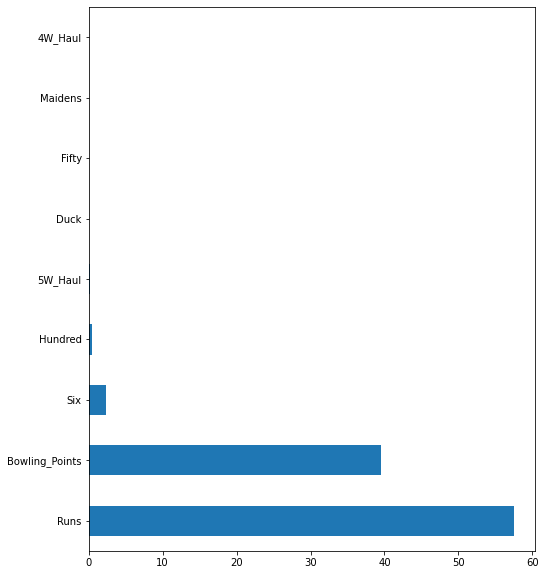

In [669]:
feat = pd.Series(cat.feature_importances_,index=train.columns)
feat.nlargest(30).plot(kind='barh', figsize=(8,10))

# Submission File

In [633]:
y_cat = np.array(y_cat)

In [634]:
y_cat = y_cat.reshape(y_cat.shape[0],1)

In [635]:
y_prediction_cat_cor = np.hstack((sample_submission,y_cat))

In [636]:
df = pd.DataFrame(data = y_prediction_cat_cor,columns=["Id","Total Points"])
df.to_csv("IPL_Ensemble_Cat_cor.csv",index=False)

# Ensemble

In [622]:
y_ensemble_cor = y_cat_cor*0.7 + y_ensemble*0.2+y_xgbr_cor*0.1

In [623]:
r2_score(y_ensemble_cor,y_test)

0.9994069317175304

# Submission File

In [624]:
y_ensemble_cor = np.array(y_ensemble_cor)

In [625]:
y_ensemble_cor = y_ensemble_cor.reshape(y_ensemble_cor.shape[0],1)

In [627]:
sample_submission = sample_submission["Id"]

In [628]:
sample_submission = np.array(sample_submission)

In [629]:
sample_submission = sample_submission.reshape(sample_submission.shape[0],1)

In [630]:
y_prediction = np.hstack((sample_submission,y_ensemble_cor))

In [631]:
df = pd.DataFrame(data = y_prediction,columns=["Id","Total Points"])
df.to_csv("IPL_Ensemble_Cor.csv",index=False)